<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Regresiones%20NO%20Lineales/Rio%20de%20Janeiro/Regresiones/Actividad_3_6_Regresion_NO_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión NO lineal

## Actividad 3.6


## 1.   **Importamos librerías y leemos archivo**


In [ ]:
%pip install scipy

In [ ]:
%pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
data=pd.read_csv('rio_de_janeiro_USD.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data['price'].head()

,price
0,55.80
1,36.54
2,39.60
3,36.18
4,57.78


##2.   **Realiza** las acciones de preprocesamiento necesarias: **Nulos y Outliers**



In [ ]:
print('Total de valores nulos dentro del DF:  ',data.isnull().sum().sum())

Total de valores nulos dentro del DF:   0


In [ ]:
#Se crea una copia del frame original
data_copia = data.copy()

In [ ]:
#Se detectan los valores unicos de la columna
np.unique(data_copia['host_is_superhost'])

array([0, 1])

In [ ]:
#Se reemplazan los datos categoricos a numerico
data_copia['host_is_superhost'] = data_copia['host_is_superhost'].replace('f',0)
data_copia['host_is_superhost'] = data_copia['host_is_superhost'].replace('t',1)
data_copia['host_is_superhost'] = data_copia['host_is_superhost'].astype(int)

In [ ]:
#Se detectan los valores unicos de la columna
np.unique(data_copia['room_type'])

array([1, 2, 3, 4])

In [ ]:
#Se reemplazan los datos categoricos a numerico
data_copia['room_type'] = data_copia['room_type'].replace('Entire home/apt',1)
data_copia['room_type'] = data_copia['room_type'].replace('Hotel room',2)
data_copia['room_type'] = data_copia['room_type'].replace('Private room',3)
data_copia['room_type'] = data_copia['room_type'].replace('Shared room',4)
data_copia['room_type'] = data_copia['room_type'].astype(int)

In [ ]:
#Se eliminan columnas innecesarias
data_evaluar = data_copia.select_dtypes(include=[int, float])
data_evaluar.head(3)

,host_is_superhost,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,1,1,17878.0,68997,1.0,1.00,2.0,5.0,-22.96599,-43.17940,...,23.0,4.71,4.77,4.64,4.84,4.91,4.77,4.67,1.0,1.88
1,1,1,25026.0,102840,1.0,0.82,1.0,5.0,-22.97735,-43.19105,...,23.0,4.73,4.71,4.79,4.82,4.92,4.84,4.62,1.0,1.70
2,0,3,220377.0,1142424,1.0,0.47,3.0,3.0,-22.92880,-43.24046,...,1.0,5.00,5.00,5.00,5.00,4.80,4.80,5.00,3.0,0.03


##3.  **Crear Modelos**

En primer lugar, para facilitar la busqueda de variables que sirvan correctamente como variables independientes para cada modelo se utiliza un 'heat map' el cuál nos muestre las variables con la mejor correlación.

In [ ]:
#Encontramos todos los coeficientes de correlacion entre las variables
corr_factors = data_evaluar.corr()
#Encontramos el valor absoluto de todas las correlaciones entre las variables
corr_factors1 = abs(corr_factors)

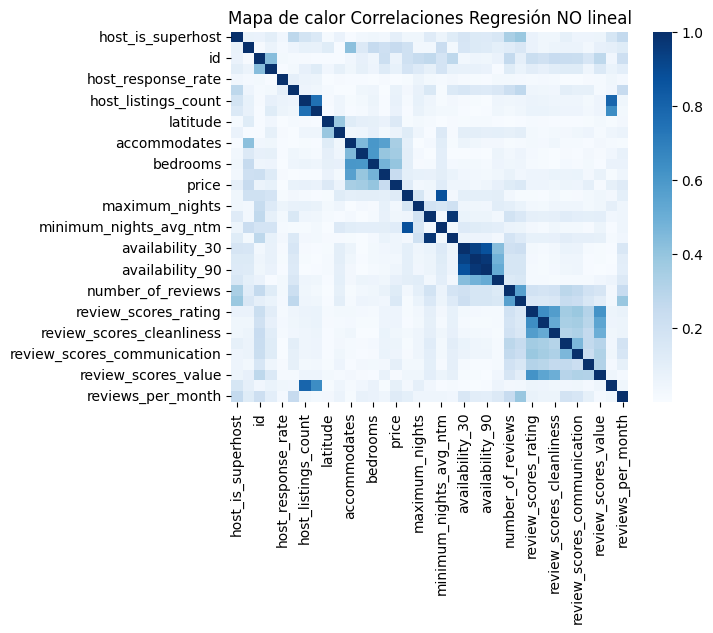

In [ ]:
#Ajustemos el mapa del calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corr_factors1, cmap='Blues')
Heat_Map
plt.title('Mapa de calor Correlaciones Regresión NO lineal')
plt.show()

##  4. **Elegir** 2 modelos de correlación No lineal y **Analizar** la correlación que existe entre las siguientes variables:

1. **host_response_rate** (variable objetivo)
2. **host_acceptance_rate** (variable objetivo)
3. **host_total_listings_count** (variable objetivo)
4. **accommodates** (variable objetivo)
5. **reviews_per_month** (variable objetivo)
6. **price**(variable objetivo)



### host_response_rate

In [ ]:
a=corr_factors1.sort_values(by='host_response_rate', ascending=False).head(7)
a=a[1:].head()
a.head()

,host_is_superhost,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_acceptance_rate,0.275697,0.053824,0.017318,0.024942,0.093410,1.000000,0.051524,0.042268,0.019247,0.004012,...,0.272686,0.046039,0.042073,0.037536,0.103972,0.089363,0.088067,0.015801,0.037068,0.249251
host_listings_count,0.180728,0.079456,0.014963,0.083874,0.060843,0.051524,1.000000,0.753827,0.014227,0.048061,...,0.043414,0.059405,0.056391,0.048849,0.046944,0.046550,0.026367,0.051222,0.795673,0.041989
host_total_listings_count,0.141758,0.075158,0.004457,0.118505,0.056345,0.042268,0.753827,1.000000,0.004892,0.045002,...,0.039579,0.065243,0.066137,0.056785,0.051566,0.052687,0.033088,0.053984,0.643661,0.026340
maximum_nights,0.041497,0.031571,0.243256,0.132185,0.054833,0.077244,0.081313,0.073868,0.025189,0.048572,...,0.066067,0.035138,0.026012,0.044584,0.049514,0.043443,0.024786,0.043010,0.090298,0.047908
calculated_host_listings_count,0.164203,0.091979,0.038403,0.063763,0.039233,0.037068,0.795673,0.643661,0.008383,0.049267,...,0.032862,0.055901,0.054583,0.040137,0.037896,0.040894,0.023146,0.045372,1.000000,0.041679


In [ ]:
#Variable Independiente
a1=a.index[0]
a1

'host_acceptance_rate'

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_1 = data_evaluar[a1]
var_dep_1 = data_evaluar['host_response_rate']

In [ ]:
x=vars_indep_1
y=var_dep_1

### Modelos

#### Modelo 1:

            y = ax^2 + bx + c   ("Función cuadrática")

In [ ]:
def  func1 (x, a, b, c):
     return a * np.square(x) + b * x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1 , vars_indep_1, var_dep_1)

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([ 0.05115522, -0.05701785,  1.00115172])

In [ ]:
# Predicciones
y_pred1 = func1(x, *parametros1)
y_pred1.head()

,host_acceptance_rate
0,0.995289
1,0.988794
2,0.985654
3,0.994404
4,0.995289


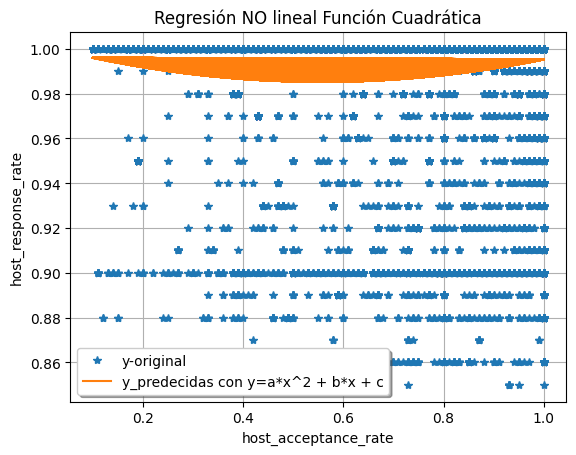

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred1, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1= r2_score(y,y_pred1)
R2_Modelo1

0.019288691076734366

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
R_1=np.sqrt(R2_Modelo1)
R_1

0.1388837322249599

#### Modelo 2:
            y = a*exp(-bx) + c   ("Función exponencial")


In [ ]:
def  func2 (x, a, b, c):
     return a * np.exp(-b * x) + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2 , vars_indep_1, var_dep_1)
# Predicciones
y_pred2 = func2(x, *parametros2)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2= r2_score(y,y_pred2)
#Calculamos el coeficiente de correlacion del modelo
R_2=np.sqrt(R2_Modelo2)

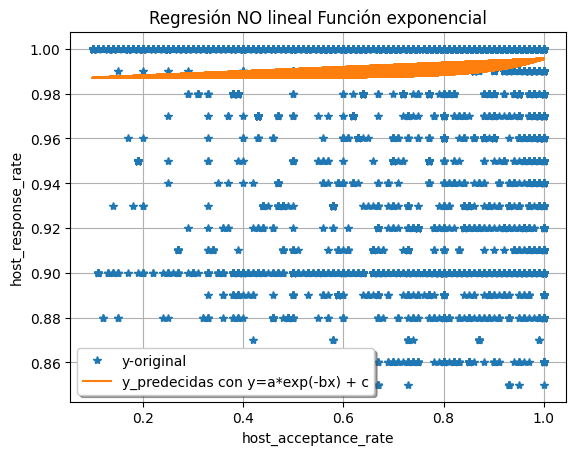

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred2, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 3:

           y = 1/a*x           ("Función inversa")


In [ ]:
def  func3 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros3, covs3= curve_fit(func3 , vars_indep_1, var_dep_1)
# Predicciones
y_pred3 = func3(x, *parametros3)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo3= r2_score(y,y_pred3)
#Calculamos el coeficiente de correlacion del modelo
R_3=np.sqrt(R2_Modelo3)

<ipython-input-28-997376f21c0c>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros3, covs3= curve_fit(func3 , vars_indep_1, var_dep_1)
<ipython-input-28-997376f21c0c>:11: RuntimeWarning: invalid value encountered in sqrt
  R_3=np.sqrt(R2_Modelo3)


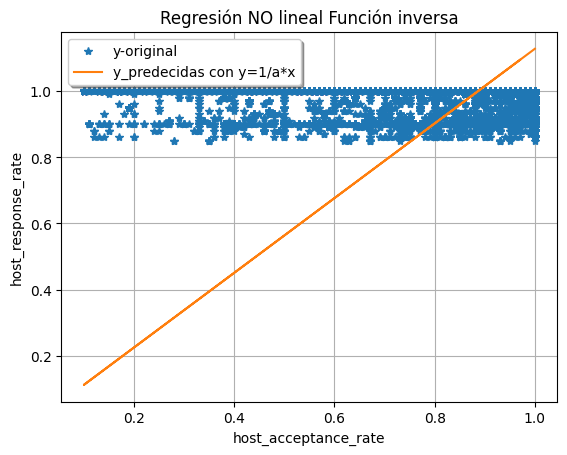

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred3, label='y_predecidas con y=1/a*x')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4:

            y = a*np.sin(x) + b ("Función senoidal")


In [ ]:
def  func4 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros4, covs4= curve_fit(func4 , vars_indep_1, var_dep_1)
# Predicciones
y_pred4 = func4(x, *parametros4)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo4= r2_score(y,y_pred4)
#Calculamos el coeficiente de correlacion del modelo
R_4=np.sqrt(R2_Modelo4)

<ipython-input-30-758dc1cdbdf0>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros4, covs4= curve_fit(func4 , vars_indep_1, var_dep_1)


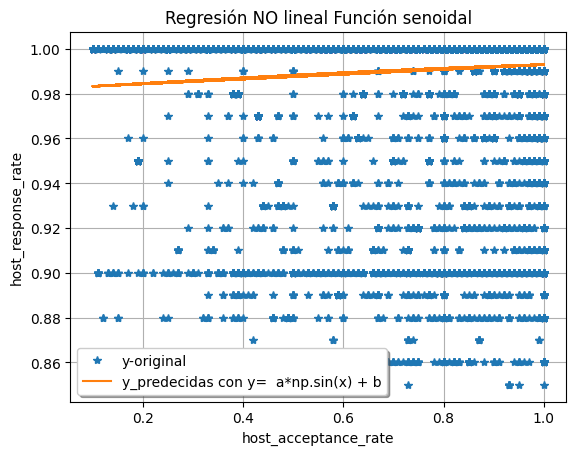

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred4, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5:
            y = a*np.tan(x) + b ("Función tangencial")


In [ ]:
def  func5 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros5, covs= curve_fit(func5 , vars_indep_1, var_dep_1)
# Predicciones
y_pred5 = func5(x, *parametros5)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo5= r2_score(y,y_pred5)
#Calculamos el coeficiente de correlacion del modelo
R_5=np.sqrt(R2_Modelo5)

<ipython-input-32-e4edc3a11a66>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros5, covs= curve_fit(func5 , vars_indep_1, var_dep_1)


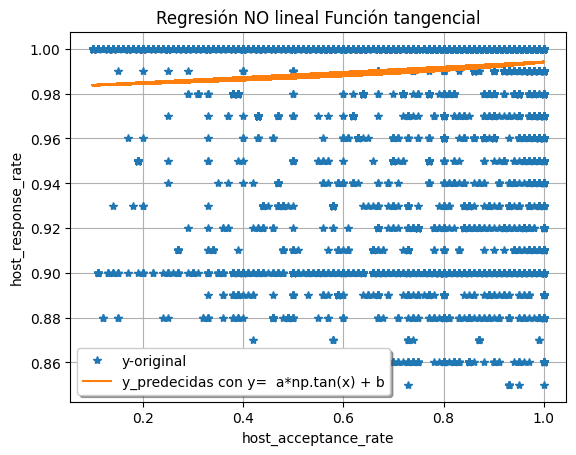

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred5, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6:
            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

In [ ]:
def  func6 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros6, covs6= curve_fit(func6 , vars_indep_1, var_dep_1)
# Predicciones
y_pred6 = func6(x, *parametros6)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo6= r2_score(y,y_pred6)
#Calculamos el coeficiente de correlacion del modelo
R_6=np.sqrt(R2_Modelo6)

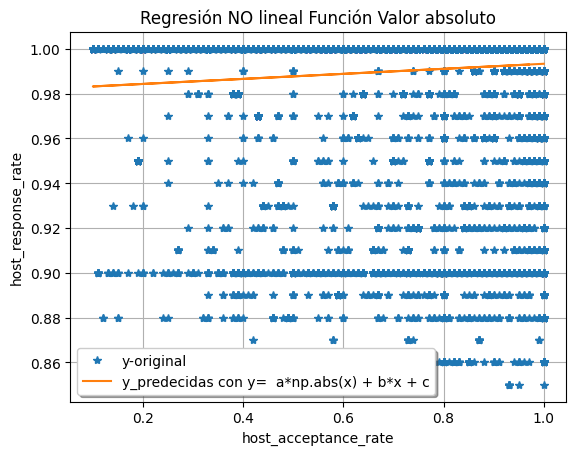

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred6, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7:

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

<ipython-input-36-f942e988e2ab>:11: RuntimeWarning: invalid value encountered in sqrt
  R_7=np.sqrt(R2_Modelo7)


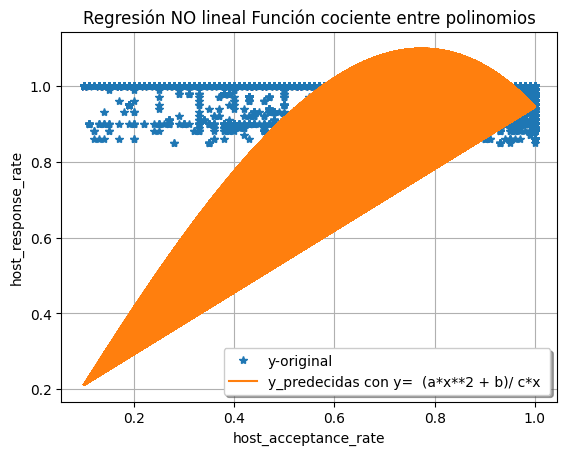

In [ ]:
def  func7 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros7, covs7= curve_fit(func7 , vars_indep_1, var_dep_1)
# Predicciones
y_pred7 = func7(x, *parametros7)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo7= r2_score(y,y_pred7)
#Calculamos el coeficiente de correlacion del modelo
R_7=np.sqrt(R2_Modelo7)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred7, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8:
            y = a*np.log(x) + b  (Función logaritmica)


<ipython-input-37-f35254d58fa9>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros8, covs8= curve_fit(func8 , vars_indep_1, var_dep_1)


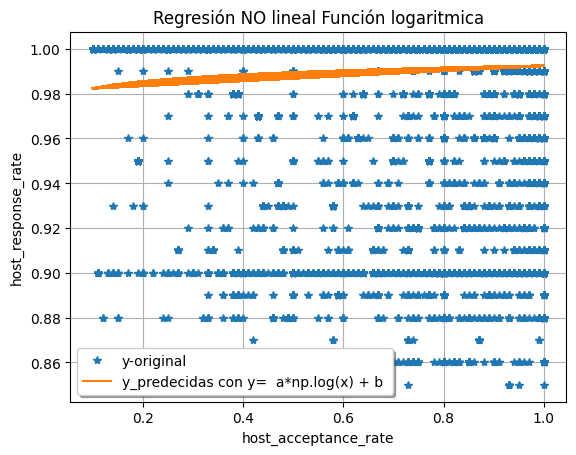

In [ ]:
def  func8 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros8, covs8= curve_fit(func8 , vars_indep_1, var_dep_1)
# Predicciones
y_pred8 = func8(x, *parametros8)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo8= r2_score(y,y_pred8)
#Calculamos el coeficiente de correlacion del modelo
R_8=np.sqrt(R2_Modelo8)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred8, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 9:

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)


<ipython-input-38-a3e69639b31d>:11: RuntimeWarning: invalid value encountered in sqrt
  R_9=np.sqrt(R2_Modelo9)


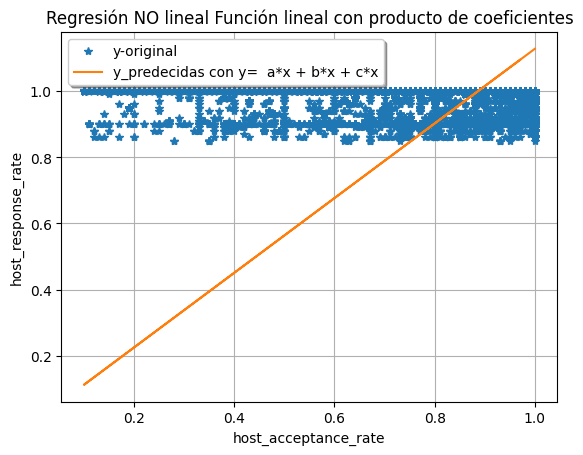

In [ ]:
def  func9 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros9, covs8= curve_fit(func9 , vars_indep_1, var_dep_1)
# Predicciones
y_pred9 = func9(x, *parametros9)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo9= r2_score(y,y_pred9)
#Calculamos el coeficiente de correlacion del modelo
R_9=np.sqrt(R2_Modelo9)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred9, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10:


            y = 1/a*x**2  (Función cuadrática inversa)


<ipython-input-39-c725e0028b91>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros10, covs10= curve_fit(func10 , vars_indep_1, var_dep_1)
<ipython-input-39-c725e0028b91>:11: RuntimeWarning: invalid value encountered in sqrt
  R_10=np.sqrt(R2_Modelo10)


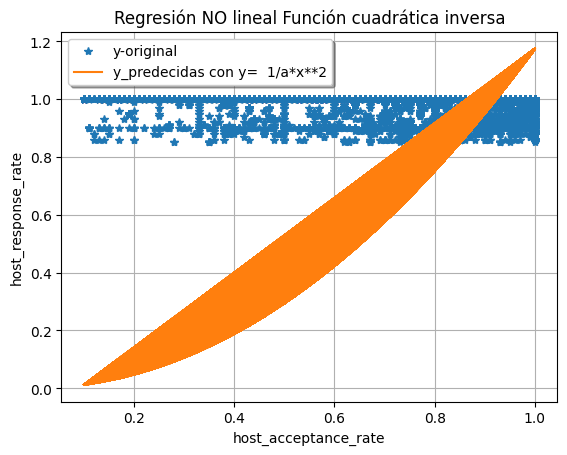

In [ ]:
def  func10 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros10, covs10= curve_fit(func10 , vars_indep_1, var_dep_1)
# Predicciones
y_pred10 = func10(x, *parametros10)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo10= r2_score(y,y_pred10)
#Calculamos el coeficiente de correlacion del modelo
R_10=np.sqrt(R2_Modelo10)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred10, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11:

            y = a/b*x**2 + c*x (Función polinomial inversa)



<ipython-input-40-6b5ffe2ef8f3>:11: RuntimeWarning: invalid value encountered in sqrt
  R_11=np.sqrt(R2_Modelo11)


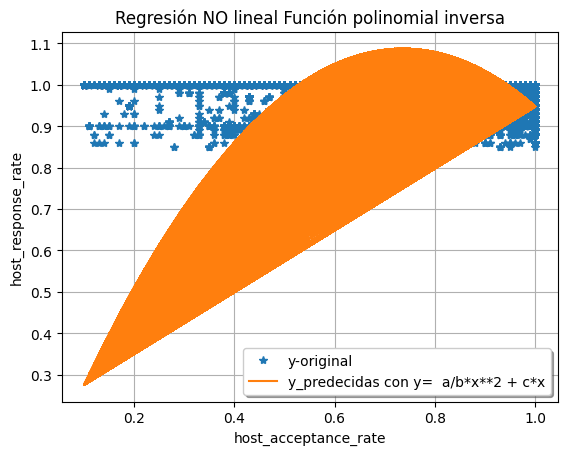

In [ ]:
def  func11 (x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros11, covs11= curve_fit(func11, vars_indep_1, var_dep_1)
# Predicciones
y_pred11 = func11(x, *parametros11)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo11= r2_score(y,y_pred11)
#Calculamos el coeficiente de correlacion del modelo
R_11=np.sqrt(R2_Modelo11)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred11, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES HOST RESPONSE RATE

In [ ]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo1, R2_Modelo2,R2_Modelo3,R2_Modelo4,R2_Modelo5,R2_Modelo6,R2_Modelo7,R2_Modelo8,R2_Modelo9,R2_Modelo10,R2_Modelo11],
    'Coeficiente de Correlación': [R_1, R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11]
}

# Generar con llaves
df_coef_mult1 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 8: Función logaritmica','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult1 = df_coef_mult1.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE\n\n', df_coef_mult1)
print('\nMejor Modelo:\n', df_coef_mult1.iloc[0])

Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 1: Función Cuadrática                                            0.019289   
Modelo 2: Función Exponencial                                           0.016824   
Modelo 5: Función tangencial                                            0.012164   
Modelo 6: Función Valor absoluto                                        0.008726   
Modelo 4: Función senoidal                                              0.007005   
Modelo 8: Función logaritmica                                           0.004276   
Modelo 11: Función polinomial inversa                                 -22.257186   
Modelo 7: Función cociente entre polinomios                           -31.995271   
Modelo 9: Función lineal con producto de coefic...                    -92.085099   
Modelo 3: Función inversa                                             -92.085099   
Modelo 10:

### host_acceptance_rate

In [ ]:
a1=corr_factors1.sort_values(by='host_acceptance_rate', ascending=False).head(7)
a1.head()

,host_is_superhost,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_acceptance_rate,0.275697,0.053824,0.017318,0.024942,0.093410,1.000000,0.051524,0.042268,0.019247,0.004012,...,0.272686,0.046039,0.042073,0.037536,0.103972,0.089363,0.088067,0.015801,0.037068,0.249251
host_is_superhost,1.000000,0.074308,0.069776,0.102150,0.037007,0.275697,0.180728,0.141758,0.018032,0.068334,...,0.383337,0.067023,0.042433,0.042031,0.086128,0.052194,0.053389,0.058019,0.164203,0.255718
number_of_reviews_ltm,0.383337,0.155837,0.090543,0.063677,0.022801,0.272686,0.043414,0.039579,0.006899,0.105498,...,1.000000,0.147764,0.143835,0.154039,0.245961,0.224694,0.156863,0.109395,0.032862,0.388522
reviews_per_month,0.255718,0.118153,0.218460,0.100186,0.019958,0.249251,0.041989,0.026340,0.030529,0.061815,...,0.388522,0.070802,0.056888,0.055721,0.187458,0.162529,0.087078,0.022648,0.041679,1.000000
number_of_reviews,0.337803,0.116879,0.255930,0.119480,0.026578,0.220332,0.041390,0.027147,0.000560,0.087639,...,0.558732,0.192178,0.179664,0.194481,0.284236,0.257998,0.192943,0.170043,0.030516,0.242083


In [ ]:
#Variable Independiente
a2=a1.index[1]
a2

'host_is_superhost'

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_2 = data_evaluar[a2]
var_dep_2 = data_evaluar['host_acceptance_rate']

In [ ]:
x=vars_indep_2
y=var_dep_2

### Modelos:

#### Modelo 1:

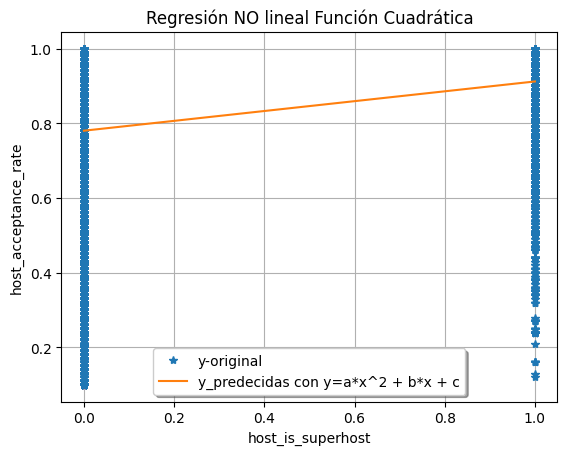

In [ ]:
def  func12 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros12, covs= curve_fit(func12 , vars_indep_2, var_dep_2)
# Predicciones
y_pred12 = func12(x, *parametros12)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo12= r2_score(y,y_pred12)
#Calculamos el coeficiente de correlacion del modelo
R_12=np.sqrt(R2_Modelo12)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred12, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 2:

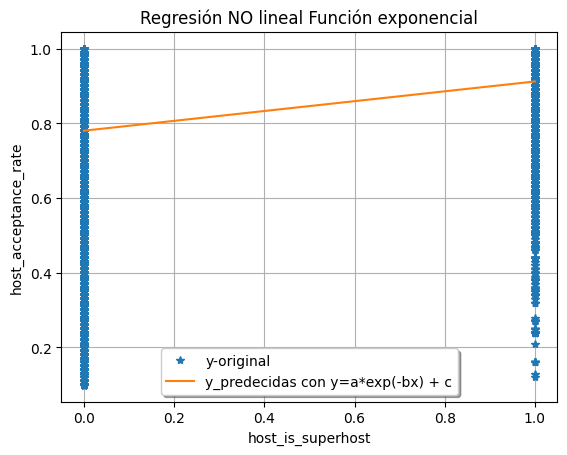

In [ ]:
def  func22 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros22, covs= curve_fit(func22 , vars_indep_2, var_dep_2)
# Predicciones
y_pred22 = func22(x, *parametros22)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo22= r2_score(y,y_pred22)
#Calculamos el coeficiente de correlacion del modelo
R_22=np.sqrt(R2_Modelo22)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred22, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


#### Modelo 3

<ipython-input-48-6330766c4816>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros32, covs3= curve_fit(func32 , vars_indep_2, var_dep_2)
<ipython-input-48-6330766c4816>:11: RuntimeWarning: invalid value encountered in sqrt
  R_32=np.sqrt(R2_Modelo32)


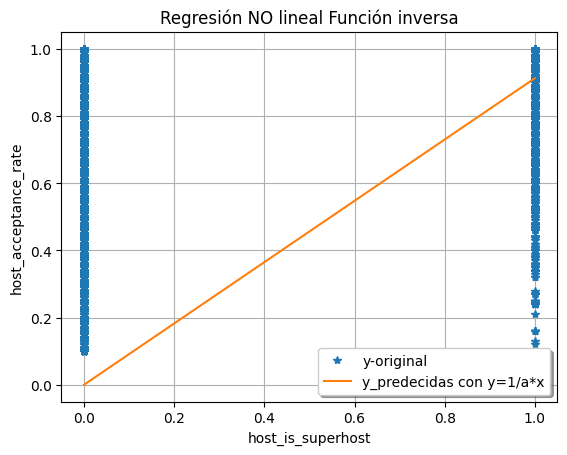

In [ ]:
def  func32 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros32, covs3= curve_fit(func32 , vars_indep_2, var_dep_2)
# Predicciones
y_pred32 = func32(x, *parametros32)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo32= r2_score(y,y_pred32)
#Calculamos el coeficiente de correlacion del modelo
R_32=np.sqrt(R2_Modelo32)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred32, label='y_predecidas con y=1/a*x')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4

<ipython-input-49-ae52d34afe66>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros42, covs4= curve_fit(func42 , vars_indep_2, var_dep_2)


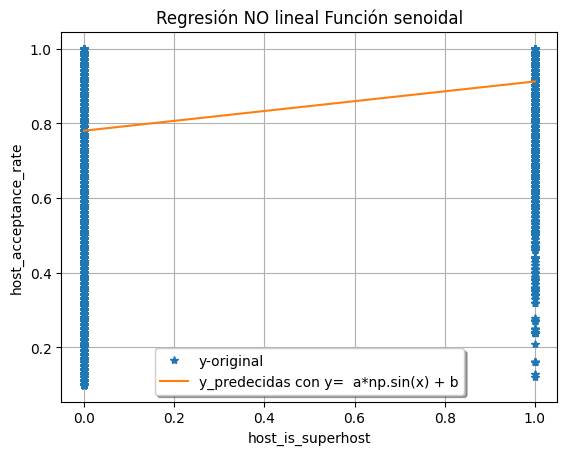

In [ ]:
def  func42 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros42, covs4= curve_fit(func42 , vars_indep_2, var_dep_2)
# Predicciones
y_pred42 = func42(x, *parametros42)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo42= r2_score(y,y_pred42)
#Calculamos el coeficiente de correlacion del modelo
R_42=np.sqrt(R2_Modelo42)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred42, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5

<ipython-input-50-236f88e1600a>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros52, covs= curve_fit(func52 , vars_indep_2, var_dep_2)


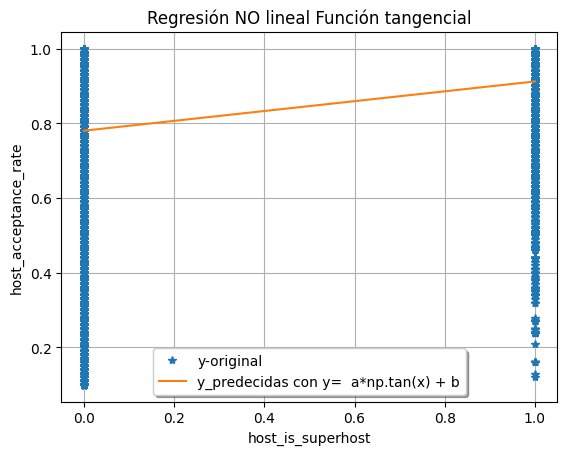

In [ ]:
def  func52 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros52, covs= curve_fit(func52 , vars_indep_2, var_dep_2)
# Predicciones
y_pred52 = func52(x, *parametros52)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo52= r2_score(y,y_pred52)
#Calculamos el coeficiente de correlacion del modelo
R_52=np.sqrt(R2_Modelo52)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred52, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6

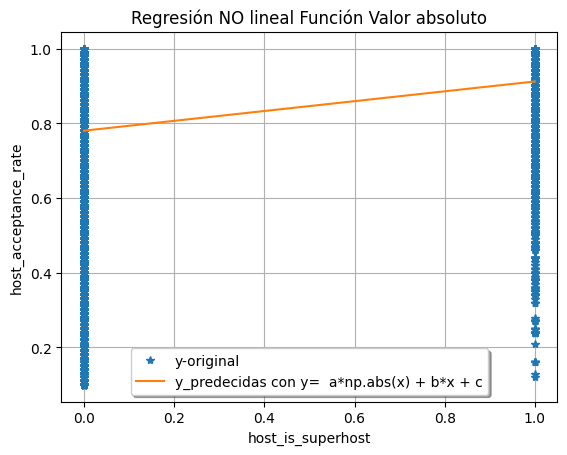

In [ ]:
def  func62 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros62, covs62= curve_fit(func62 , vars_indep_2, var_dep_2)
# Predicciones
y_pred62 = func62(x, *parametros62)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo62= r2_score(y,y_pred62)
#Calculamos el coeficiente de correlacion del modelo
R_62=np.sqrt(R2_Modelo62)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred62, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7

<ipython-input-52-1159dd7e9f27>:11: RuntimeWarning: invalid value encountered in sqrt
  R_72=np.sqrt(R2_Modelo72)


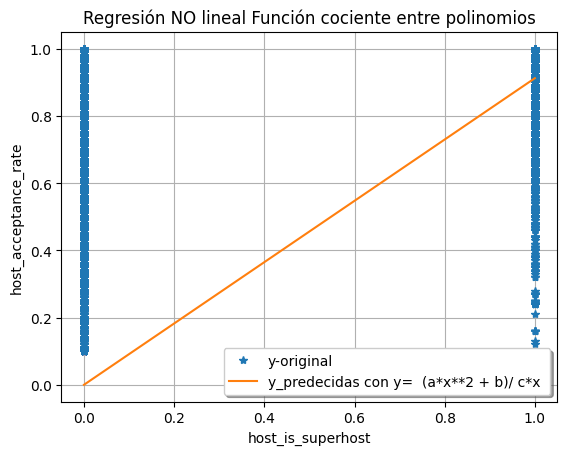

In [ ]:
def  func72 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros72, covs72= curve_fit(func72 , vars_indep_2, var_dep_2)
# Predicciones
y_pred72 = func72(x, *parametros72)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo72= r2_score(y,y_pred72)
#Calculamos el coeficiente de correlacion del modelo
R_72=np.sqrt(R2_Modelo72)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred72, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8

In [ ]:
'''
def  func82 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros82, covs82= curve_fit(func82 , vars_indep_2, var_dep_2)
# Predicciones
y_pred82 = func82(x, *parametros82)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo82= r2_score(y,y_pred82)
#Calculamos el coeficiente de correlacion del modelo
R_82=np.sqrt(R2_Modelo82)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred82, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()'''

"\ndef  func82 (x, a, b, c):\n     return a*np.log(x) + b\n\n#Ajustamos los parámetros de la función curve_fit\nparametros82, covs82= curve_fit(func82 , vars_indep_2, var_dep_2)\n# Predicciones\ny_pred82 = func82(x, *parametros82)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo82= r2_score(y,y_pred82)\n#Calculamos el coeficiente de correlacion del modelo\nR_82=np.sqrt(R2_Modelo82)\n\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred82, label='y_predecidas con y=  a*np.log(x) + b ')\nplt.xlabel('host_is_superhost')\nplt.ylabel('host_acceptance_rate')\nplt.title('Regresión NO lineal Función logaritmica')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()"

#### Modelo 9

<ipython-input-54-ff07ba646722>:11: RuntimeWarning: invalid value encountered in sqrt
  R_92=np.sqrt(R2_Modelo92)


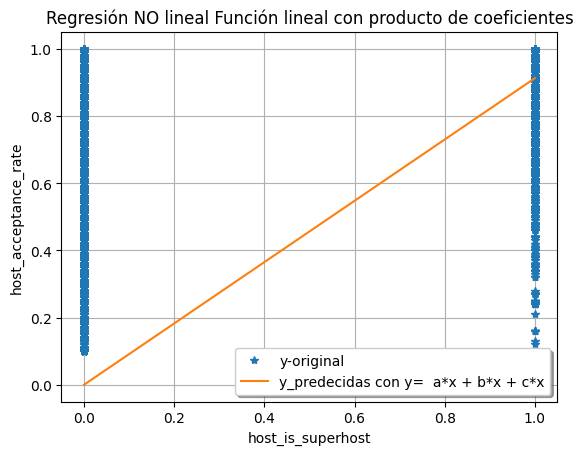

In [ ]:
def  func92 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros92, covs92= curve_fit(func92 , vars_indep_2, var_dep_2)
# Predicciones
y_pred92 = func92(x, *parametros92)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo92= r2_score(y,y_pred92)
#Calculamos el coeficiente de correlacion del modelo
R_92=np.sqrt(R2_Modelo92)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred92, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10

<ipython-input-55-7159f4aa5abf>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros102, covs102= curve_fit(func102 , vars_indep_2, var_dep_2)
<ipython-input-55-7159f4aa5abf>:11: RuntimeWarning: invalid value encountered in sqrt
  R_102=np.sqrt(R2_Modelo102)


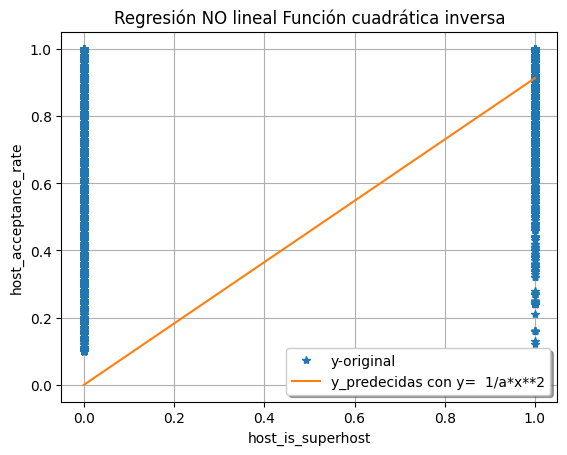

In [ ]:
def  func102 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros102, covs102= curve_fit(func102 , vars_indep_2, var_dep_2)
# Predicciones
y_pred102 = func102(x, *parametros102)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo102= r2_score(y,y_pred102)
#Calculamos el coeficiente de correlacion del modelo
R_102=np.sqrt(R2_Modelo102)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred102, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11

<ipython-input-56-1f7eec16d337>:11: RuntimeWarning: invalid value encountered in sqrt
  R_112=np.sqrt(R2_Modelo112)


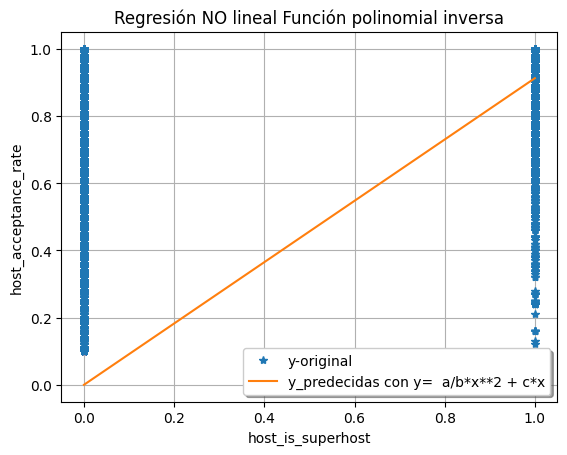

In [ ]:
def  func112 (x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros112, covs112= curve_fit(func112, vars_indep_2, var_dep_2)
# Predicciones
y_pred112 = func112(x, *parametros112)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo112= r2_score(y,y_pred112)
#Calculamos el coeficiente de correlacion del modelo
R_112=np.sqrt(R2_Modelo112)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred112, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES host_acceptance_rate

In [ ]:
# Preparar datos del Frame
coef_data2 = {
    'Coeficiente de Determinación': [R2_Modelo12, R2_Modelo22,R2_Modelo32, R2_Modelo42, R2_Modelo52, R2_Modelo62, R2_Modelo72, R2_Modelo92, R2_Modelo102, R2_Modelo112],
    'Coeficiente de Correlación': [R_12, R_22,R_32, R_42, R_52, R_62, R_72, R_92, R_102, R_112]
}

# Generar con llaves
df_coef_mult2 = pd.DataFrame(coef_data2, index=['Modelo 1: Función Cuadrática','Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult2 = df_coef_mult2.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones host_acceptance_rate REGRESIÓN NO MULTIPLE\n\n', df_coef_mult2)
print('\nMejor Modelo:\n', df_coef_mult2.iloc[0])

Tabla de correlaciones host_acceptance_rate REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 1: Función Cuadrática                                            0.076009   
Modelo 6: Función Valor absoluto                                        0.076009   
Modelo 4: Función senoidal                                              0.076009   
Modelo 5: Función tangencial                                            0.076009   
Modelo 2: Función Exponencial                                           0.076009   
Modelo 3: Función inversa                                              -8.681908   
Modelo 10: Función cuadrática inversa                                  -8.681908   
Modelo 9: Función lineal con producto de coefic...                     -8.681908   
Modelo 7: Función cociente entre polinomios                            -8.681908   
Modelo 11: Función polinomial inversa                                  -8.681908   

       

### host_total_listings_count

In [ ]:
a=corr_factors1.sort_values(by='host_total_listings_count', ascending=False).head(7)
a.head()

,host_is_superhost,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_total_listings_count,0.141758,0.075158,0.004457,0.118505,0.056345,0.042268,0.753827,1.000000,0.004892,0.045002,...,0.039579,0.065243,0.066137,0.056785,0.051566,0.052687,0.033088,0.053984,0.643661,0.026340
host_listings_count,0.180728,0.079456,0.014963,0.083874,0.060843,0.051524,1.000000,0.753827,0.014227,0.048061,...,0.043414,0.059405,0.056391,0.048849,0.046944,0.046550,0.026367,0.051222,0.795673,0.041989
calculated_host_listings_count,0.164203,0.091979,0.038403,0.063763,0.039233,0.037068,0.795673,0.643661,0.008383,0.049267,...,0.032862,0.055901,0.054583,0.040137,0.037896,0.040894,0.023146,0.045372,1.000000,0.041679
host_is_superhost,1.000000,0.074308,0.069776,0.102150,0.037007,0.275697,0.180728,0.141758,0.018032,0.068334,...,0.383337,0.067023,0.042433,0.042031,0.086128,0.052194,0.053389,0.058019,0.164203,0.255718
host_id,0.102150,0.061589,0.433434,1.000000,0.007796,0.024942,0.083874,0.118505,0.037838,0.089633,...,0.063677,0.105638,0.083601,0.111657,0.118049,0.118898,0.048730,0.141593,0.063763,0.100186


In [ ]:
#Variable Independiente
a2=a.index[1]
a2

'host_listings_count'

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_3 = data_evaluar[a2]
var_dep_3 = data_evaluar['host_total_listings_count']
x=vars_indep_3
y=var_dep_3

### Modelos:

#### Modelo 1:

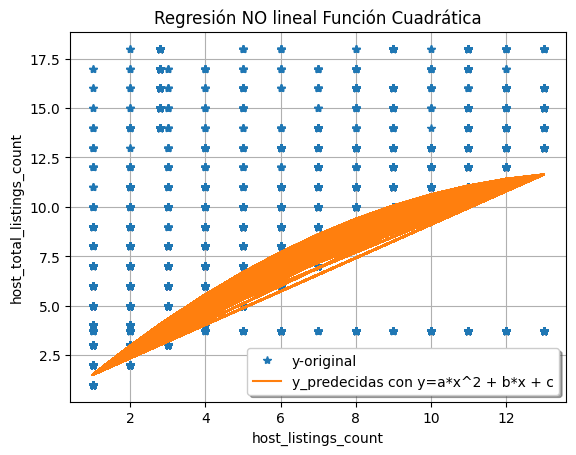

In [ ]:
def  func13 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros13, covs= curve_fit(func13 , vars_indep_3, var_dep_3)
# Predicciones
y_pred13 = func13(x, *parametros13)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo13= r2_score(y,y_pred13)
#Calculamos el coeficiente de correlacion del modelo
R_13=np.sqrt(R2_Modelo13)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred13, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 2:

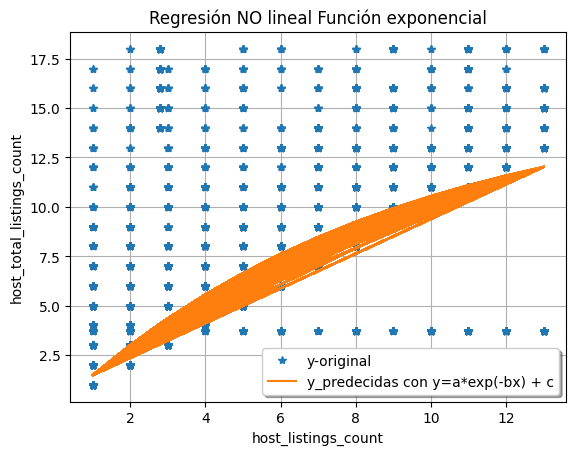

In [ ]:
def  func23 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros23, covs= curve_fit(func23 , vars_indep_3, var_dep_3)
# Predicciones
y_pred23 = func23(x, *parametros23)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo23= r2_score(y,y_pred23)
#Calculamos el coeficiente de correlacion del modelo
R_23=np.sqrt(R2_Modelo23)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred23, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


#### Modelo 3:

<ipython-input-63-efc386f4e5b5>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)


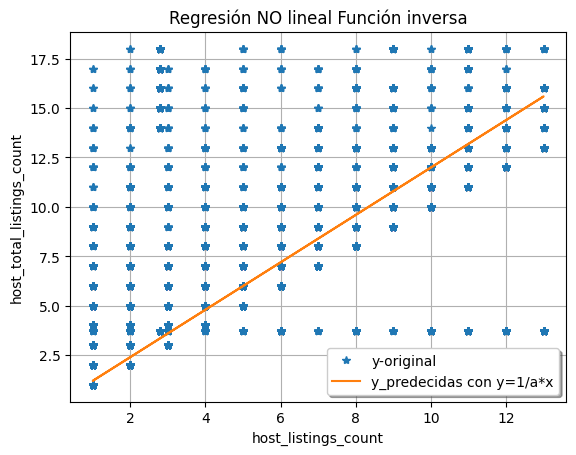

In [ ]:
def  func33 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)
# Predicciones
y_pred33 = func33(x, *parametros33)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo33= r2_score(y,y_pred33)
#Calculamos el coeficiente de correlacion del modelo
R_33=np.sqrt(R2_Modelo33)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred33, label='y_predecidas con y=1/a*x')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4:

<ipython-input-64-065bcbecb521>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)


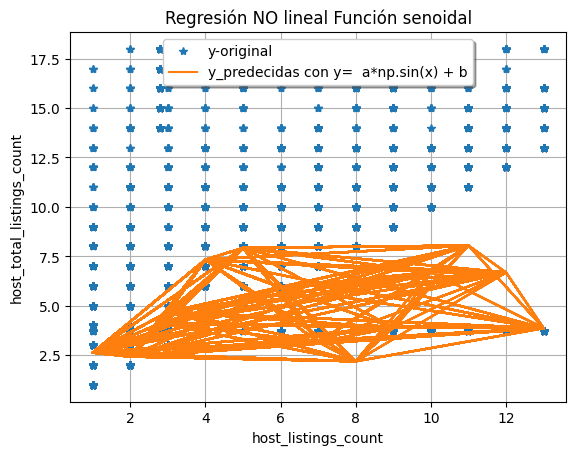

In [ ]:
def  func43 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)
# Predicciones
y_pred43 = func43(x, *parametros43)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo43= r2_score(y,y_pred43)
#Calculamos el coeficiente de correlacion del modelo
R_43=np.sqrt(R2_Modelo43)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred43, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5:

<ipython-input-65-ff95b18c9248>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)


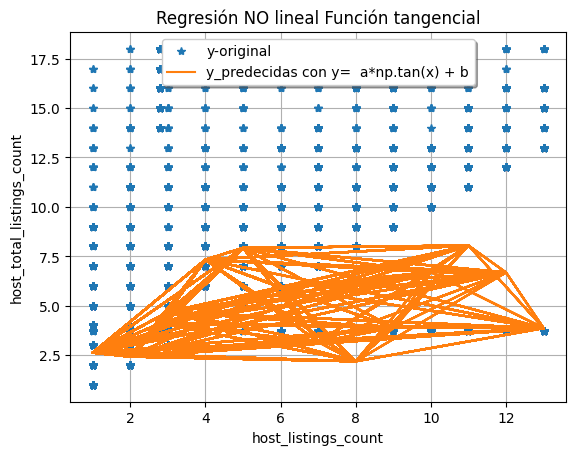

In [ ]:
def  func53 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)
# Predicciones
y_pred53 = func53(x, *parametros53)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo53= r2_score(y,y_pred53)
#Calculamos el coeficiente de correlacion del modelo
R_53=np.sqrt(R2_Modelo53)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred53, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6:

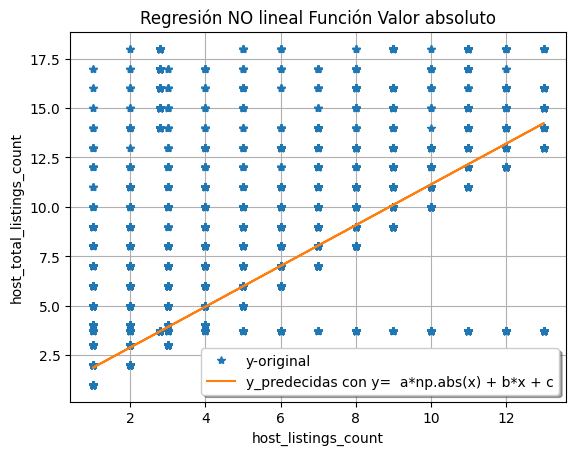

In [ ]:
def  func63 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros63, covs63= curve_fit(func63 , vars_indep_3, var_dep_3)
# Predicciones
y_pred63 = func63(x, *parametros63)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo63= r2_score(y,y_pred63)
#Calculamos el coeficiente de correlacion del modelo
R_63=np.sqrt(R2_Modelo63)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred63, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7:

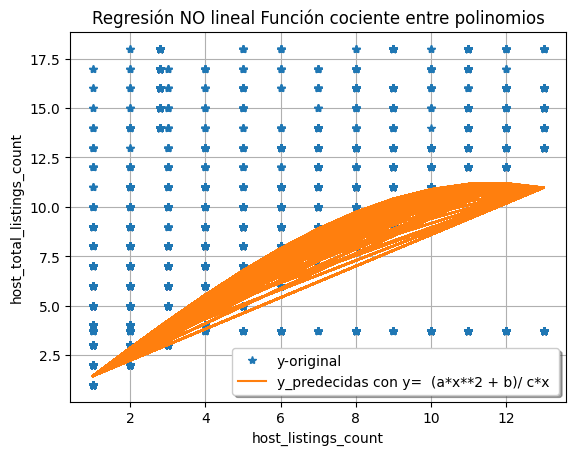

In [ ]:
def  func73 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros73, covs73= curve_fit(func73 , vars_indep_3, var_dep_3)
# Predicciones
y_pred73 = func73(x, *parametros73)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo73= r2_score(y,y_pred73)
#Calculamos el coeficiente de correlacion del modelo
R_73=np.sqrt(R2_Modelo73)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred73, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8:

<ipython-input-68-985b2c7a4040>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)


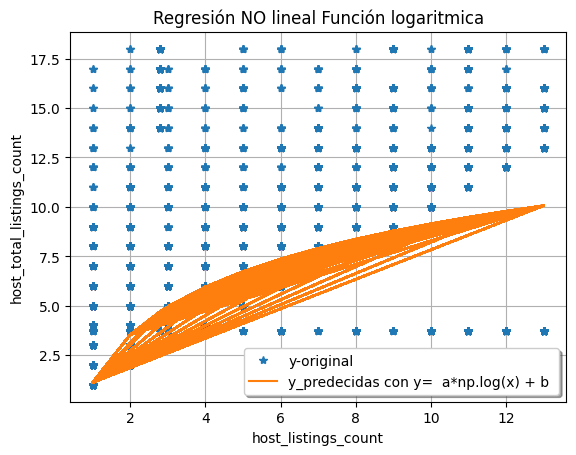

In [ ]:
def  func83 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)
# Predicciones
y_pred83 = func83(x, *parametros83)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo83= r2_score(y,y_pred83)
#Calculamos el coeficiente de correlacion del modelo
R_83=np.sqrt(R2_Modelo83)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred83, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 9:

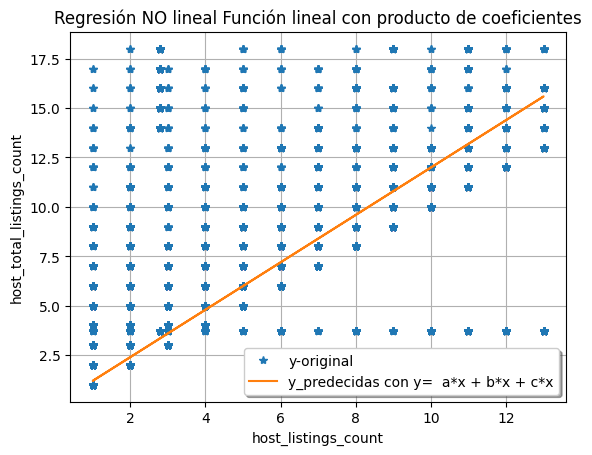

In [ ]:
def  func93 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros93, covs93= curve_fit(func93 , vars_indep_3, var_dep_3)
# Predicciones
y_pred93 = func93(x, *parametros93)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo93= r2_score(y,y_pred93)
#Calculamos el coeficiente de correlacion del modelo
R_93=np.sqrt(R2_Modelo93)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred93, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10:

<ipython-input-70-928b26dc646d>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)
<ipython-input-70-928b26dc646d>:11: RuntimeWarning: invalid value encountered in sqrt
  R_103=np.sqrt(R2_Modelo103)


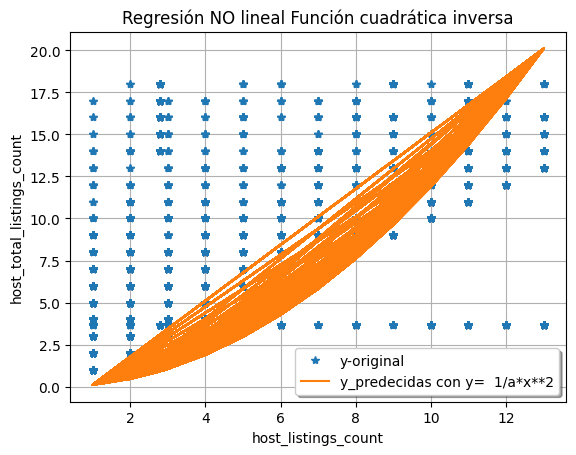

In [ ]:
def  func103 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)
# Predicciones
y_pred103 = func103(x, *parametros103)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo103= r2_score(y,y_pred103)
#Calculamos el coeficiente de correlacion del modelo
R_103=np.sqrt(R2_Modelo103)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred103, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11:

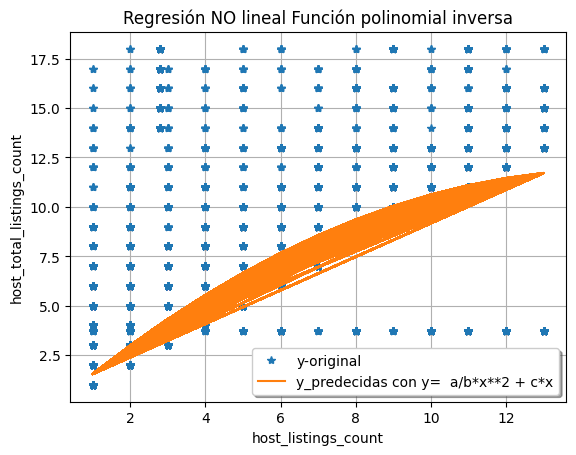

In [ ]:
def  func113(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros113, covs113= curve_fit(func113, vars_indep_3, var_dep_3)
# Predicciones
y_pred113 = func113(x, *parametros113)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo113= r2_score(y,y_pred113)
#Calculamos el coeficiente de correlacion del modelo
R_113=np.sqrt(R2_Modelo113)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred113, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES host_total_listings_count

In [ ]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo13, R2_Modelo23,R2_Modelo33,R2_Modelo43,R2_Modelo53,R2_Modelo63,R2_Modelo73,R2_Modelo83,R2_Modelo93,R2_Modelo103,R2_Modelo113],
    'Coeficiente de Correlación': [R_13, R_23,R_33,R_43,R_53,R_63,R_73,R_83,R_93,R_103,R_113]
}

# Generar con llaves
df_coef_mult3 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 8: Función logaritmica','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult3 = df_coef_mult3.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones host_total_listings_count REGRESIÓN NO MULTIPLE\n\n', df_coef_mult3)
print('\nMejor Modelo:\n', df_coef_mult3.iloc[0])

Tabla de correlaciones host_total_listings_count REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 1: Función Cuadrática                                            0.588930   
Modelo 11: Función polinomial inversa                                   0.588853   
Modelo 2: Función Exponencial                                           0.588455   
Modelo 7: Función cociente entre polinomios                             0.587903   
Modelo 6: Función Valor absoluto                                        0.568255   
Modelo 8: Función logaritmica                                           0.557102   
Modelo 9: Función lineal con producto de coefic...                      0.541204   
Modelo 3: Función inversa                                               0.541204   
Modelo 4: Función senoidal                                              0.241699   
Modelo 5: Función tangencial                                            0.241699   
Mod

### accommodates

In [ ]:
a=corr_factors1.sort_values(by='accommodates', ascending=False).head(7)
a.head()

,host_is_superhost,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
accommodates,0.005881,0.421850,0.037620,0.039742,0.006575,0.003986,0.008065,0.004613,0.118622,0.040424,...,0.018173,0.023682,0.023070,0.042546,0.016980,0.018450,0.005130,0.030507,0.018165,0.010418
bedrooms,0.040426,0.251013,0.045141,0.051313,0.000490,0.047273,0.057360,0.048675,0.089660,0.086028,...,0.048681,0.018866,0.011433,0.000659,0.020975,0.011955,0.024846,0.005292,0.067167,0.068055
beds,0.033462,0.208207,0.219951,0.126870,0.014385,0.002495,0.004095,0.006944,0.068937,0.026292,...,0.037222,0.052240,0.052512,0.062957,0.062587,0.064240,0.030391,0.070641,0.008868,0.047295
bathrooms,0.031841,0.139721,0.083122,0.088504,0.005447,0.042542,0.026408,0.018977,0.090119,0.050625,...,0.051251,0.019876,0.009760,0.002327,0.012181,0.006697,0.030972,0.012289,0.037266,0.077730
room_type,0.074308,1.000000,0.012383,0.061589,0.021328,0.053824,0.079456,0.075158,0.117716,0.006770,...,0.155837,0.069610,0.042456,0.056144,0.061800,0.060001,0.033200,0.084735,0.091979,0.118153


In [ ]:
#Variable Independiente
a3=a.index[1]
a3

'bedrooms'

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_4 = data_evaluar[a3]
var_dep_4 = data_evaluar['accommodates']

In [ ]:
x=vars_indep_4
y=var_dep_4

### Modelos:

#### Modelo 1:

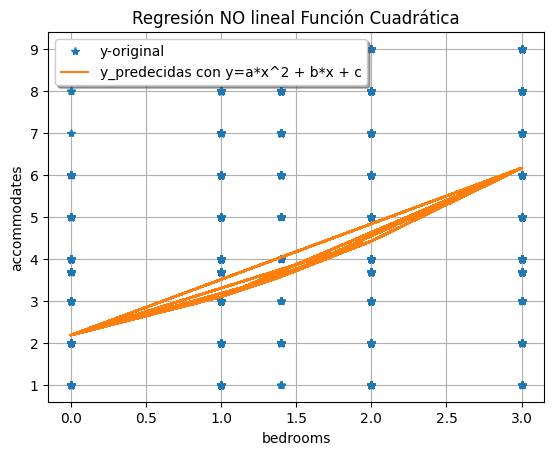

In [ ]:
def  func14 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros14, covs= curve_fit(func14 , vars_indep_4, var_dep_4)
# Predicciones
y_pred14 = func14(x, *parametros14)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo14= r2_score(y,y_pred14)
#Calculamos el coeficiente de correlacion del modelo
R_14=np.sqrt(R2_Modelo14)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred14, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

 #### Modelo 2:

In [ ]:
'''
def  func24 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros24, covs= curve_fit(func24 , vars_indep_4, var_dep_4)
# Predicciones
y_pred24 = func24(x, *parametros24)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo24= r2_score(y,y_pred24)
#Calculamos el coeficiente de correlacion del modelo
R_24=np.sqrt(R2_Modelo24)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred24, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func24 (x, a, b, c):\n     return a * np.exp(-b * x) + c\n\n#Ajustamos los parámetros de la función curve_fit\nparametros24, covs= curve_fit(func24 , vars_indep_4, var_dep_4)\n# Predicciones\ny_pred24 = func24(x, *parametros24)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo24= r2_score(y,y_pred24)\n#Calculamos el coeficiente de correlacion del modelo\nR_24=np.sqrt(R2_Modelo24)\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred24, label='y_predecidas con y=a*exp(-bx) + c')\nplt.xlabel('bedrooms')\nplt.ylabel('accommodates')\nplt.title('Regresión NO lineal Función exponencial')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()\n"

#### Modelo 3:

<ipython-input-79-da5a437a91ee>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros34, covs3= curve_fit(func34 , vars_indep_4, var_dep_4)


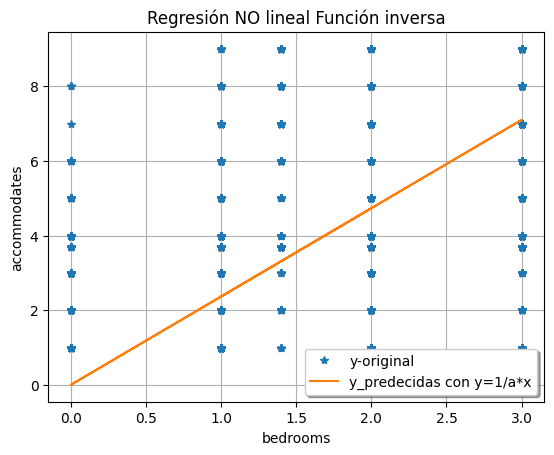

In [ ]:
def  func34 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros34, covs3= curve_fit(func34 , vars_indep_4, var_dep_4)
# Predicciones
y_pred34 = func34(x, *parametros34)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo34= r2_score(y,y_pred34)
#Calculamos el coeficiente de correlacion del modelo
R_34=np.sqrt(R2_Modelo34)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred34, label='y_predecidas con y=1/a*x')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4:

<ipython-input-80-ee8118ae5897>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros44, covs4= curve_fit(func44 , vars_indep_4, var_dep_4)


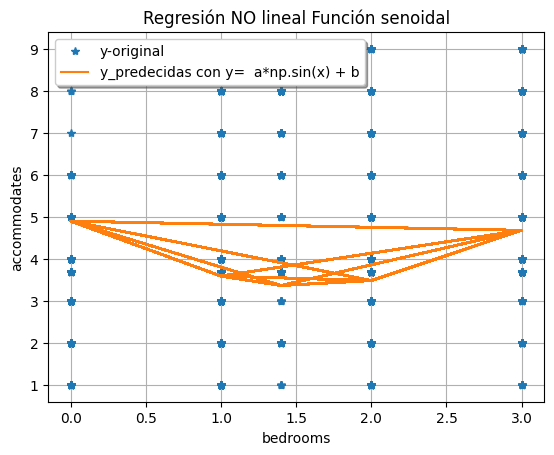

In [ ]:
def  func44 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros44, covs4= curve_fit(func44 , vars_indep_4, var_dep_4)
# Predicciones
y_pred44 = func44(x, *parametros44)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo44= r2_score(y,y_pred44)
#Calculamos el coeficiente de correlacion del modelo
R_44=np.sqrt(R2_Modelo44)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred44, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5:

<ipython-input-81-f2908cbf4aa6>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros54, covs= curve_fit(func54 , vars_indep_4, var_dep_4)


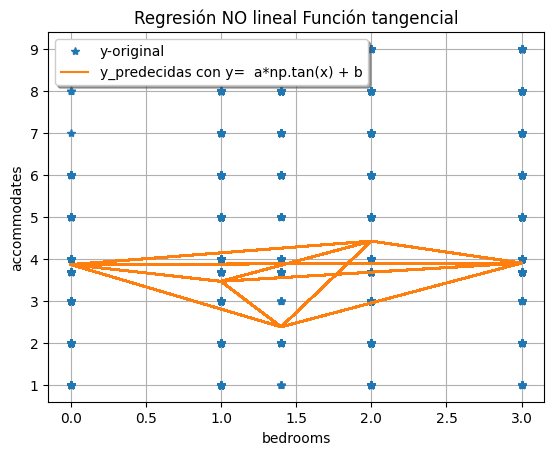

In [ ]:
def  func54 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros54, covs= curve_fit(func54 , vars_indep_4, var_dep_4)
# Predicciones
y_pred54 = func54(x, *parametros54)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo54= r2_score(y,y_pred54)
#Calculamos el coeficiente de correlacion del modelo
R_54=np.sqrt(R2_Modelo54)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred54, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6:

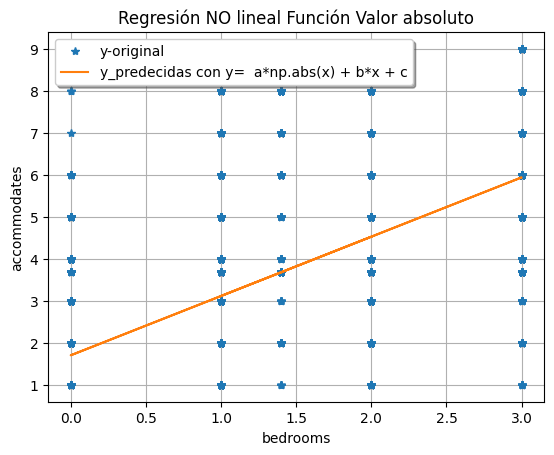

In [ ]:
def  func64 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros64, covs64= curve_fit(func64 , vars_indep_4, var_dep_4)
# Predicciones
y_pred64 = func64(x, *parametros64)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo64= r2_score(y,y_pred64)
#Calculamos el coeficiente de correlacion del modelo
R_64=np.sqrt(R2_Modelo64)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred64, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7:

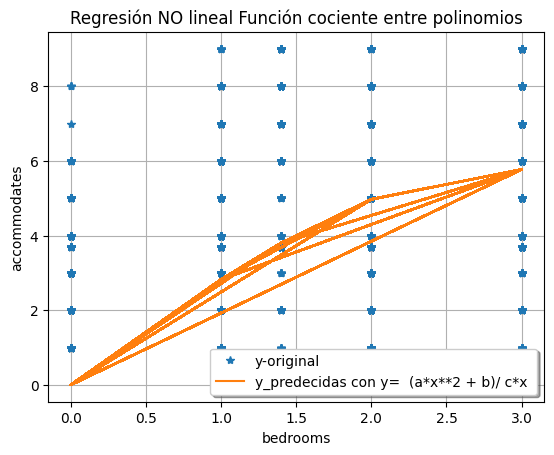

In [ ]:
def  func74 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros74, covs74= curve_fit(func74 , vars_indep_4, var_dep_4)
# Predicciones
y_pred74 = func74(x, *parametros74)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo74= r2_score(y,y_pred74)
#Calculamos el coeficiente de correlacion del modelo
R_74=np.sqrt(R2_Modelo74)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred74, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8:

In [ ]:
'''
def  func84 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros84, covs84= curve_fit(func84 , vars_indep_4, var_dep_4)
# Predicciones
y_pred84 = func84(x, *parametros84)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo84= r2_score(y,y_pred84)
#Calculamos el coeficiente de correlacion del modelo
R_84=np.sqrt(R2_Modelo84)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred84, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func84 (x, a, b, c):\n     return a*np.log(x) + b\n\n#Ajustamos los parámetros de la función curve_fit\nparametros84, covs84= curve_fit(func84 , vars_indep_4, var_dep_4)\n# Predicciones\ny_pred84 = func84(x, *parametros84)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo84= r2_score(y,y_pred84)\n#Calculamos el coeficiente de correlacion del modelo\nR_84=np.sqrt(R2_Modelo84)\n\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred84, label='y_predecidas con y=  a*np.log(x) + b ')\nplt.xlabel('bedrooms')\nplt.ylabel('accommodates')\nplt.title('Regresión NO lineal Función logaritmica')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()\n"

#### Modelo 9:

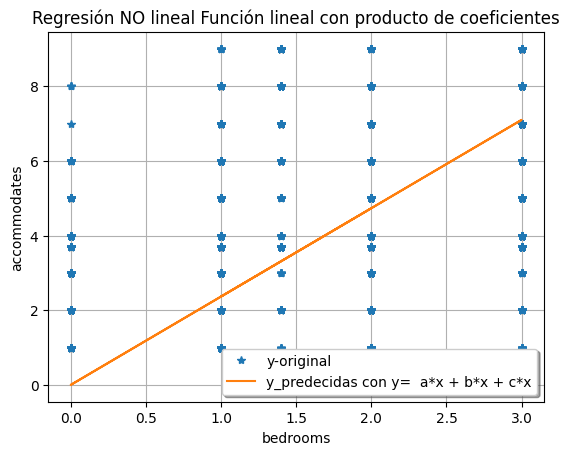

In [ ]:
def  func94 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros94, covs94= curve_fit(func94 , vars_indep_4, var_dep_4)
# Predicciones
y_pred94 = func94(x, *parametros94)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo94= r2_score(y,y_pred94)
#Calculamos el coeficiente de correlacion del modelo
R_94=np.sqrt(R2_Modelo94)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred94, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10:

<ipython-input-86-954d632d00c3>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros104, covs104= curve_fit(func104 , vars_indep_4, var_dep_4)
<ipython-input-86-954d632d00c3>:11: RuntimeWarning: invalid value encountered in sqrt
  R_104=np.sqrt(R2_Modelo104)


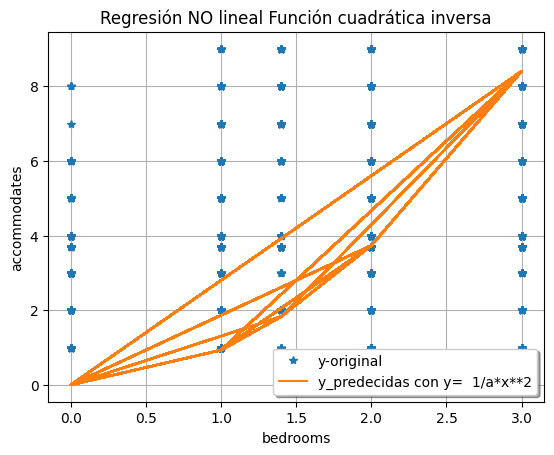

In [ ]:
def  func104 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros104, covs104= curve_fit(func104 , vars_indep_4, var_dep_4)
# Predicciones
y_pred104 = func104(x, *parametros104)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo104= r2_score(y,y_pred104)
#Calculamos el coeficiente de correlacion del modelo
R_104=np.sqrt(R2_Modelo104)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred104, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11:

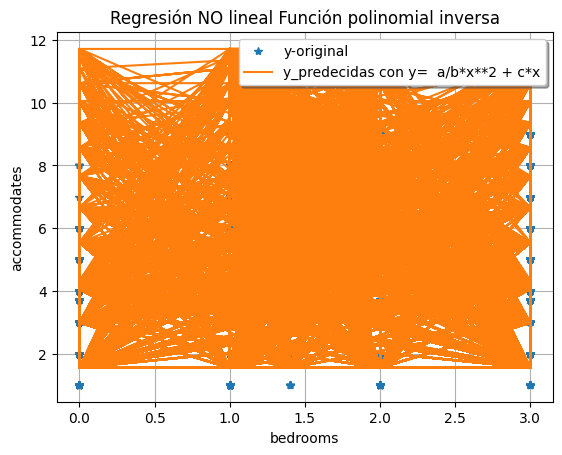

In [ ]:
def  func114(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros114, covs114= curve_fit(func114, vars_indep_4, var_dep_4)
# Predicciones
y_pred114 = func114(x, *parametros114)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo114= r2_score(y,y_pred114)
#Calculamos el coeficiente de correlacion del modelo
R_114=np.sqrt(R2_Modelo114)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred113, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES accommodates

In [ ]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo14,R2_Modelo34,R2_Modelo44,R2_Modelo54,R2_Modelo64,R2_Modelo74,R2_Modelo94,R2_Modelo104,R2_Modelo114],
    'Coeficiente de Correlación': [R_14,R_34,R_44,R_54,R_64,R_74,R_94,R_104,R_114]
}

# Generar con llaves
df_coef_mult4 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult4 = df_coef_mult4.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones accommodates REGRESIÓN NO MULTIPLE\n\n', df_coef_mult4)
print('\nMejor Modelo:\n', df_coef_mult4.iloc[0])

Tabla de correlaciones accommodates REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 1: Función Cuadrática                                            0.369606   
Modelo 6: Función Valor absoluto                                        0.363588   
Modelo 11: Función polinomial inversa                                   0.277938   
Modelo 7: Función cociente entre polinomios                             0.269902   
Modelo 3: Función inversa                                               0.155301   
Modelo 9: Función lineal con producto de coefic...                      0.155301   
Modelo 5: Función tangencial                                            0.082068   
Modelo 4: Función senoidal                                              0.061834   
Modelo 10: Función cuadrática inversa                                  -0.917799   

                                                    Coeficiente de Correlación  
Modelo 1: Función 

### reviews_per_month

In [ ]:
a=corr_factors1.sort_values(by='reviews_per_month', ascending=False).head(7)
a.head()

,host_is_superhost,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
reviews_per_month,0.255718,0.118153,0.218460,0.100186,0.019958,0.249251,0.041989,0.026340,0.030529,0.061815,...,0.388522,0.070802,0.056888,0.055721,0.187458,0.162529,0.087078,0.022648,0.041679,1.000000
number_of_reviews_ltm,0.383337,0.155837,0.090543,0.063677,0.022801,0.272686,0.043414,0.039579,0.006899,0.105498,...,1.000000,0.147764,0.143835,0.154039,0.245961,0.224694,0.156863,0.109395,0.032862,0.388522
host_is_superhost,1.000000,0.074308,0.069776,0.102150,0.037007,0.275697,0.180728,0.141758,0.018032,0.068334,...,0.383337,0.067023,0.042433,0.042031,0.086128,0.052194,0.053389,0.058019,0.164203,0.255718
host_acceptance_rate,0.275697,0.053824,0.017318,0.024942,0.093410,1.000000,0.051524,0.042268,0.019247,0.004012,...,0.272686,0.046039,0.042073,0.037536,0.103972,0.089363,0.088067,0.015801,0.037068,0.249251
number_of_reviews,0.337803,0.116879,0.255930,0.119480,0.026578,0.220332,0.041390,0.027147,0.000560,0.087639,...,0.558732,0.192178,0.179664,0.194481,0.284236,0.257998,0.192943,0.170043,0.030516,0.242083


In [ ]:
#Variable Independiente
a4=a.index[1]
a4

'number_of_reviews_ltm'

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_5 = data_evaluar[a4]
var_dep_5 = data_evaluar['reviews_per_month']

In [ ]:
x=vars_indep_5
y=var_dep_5

### Modelos:

#### Modelo 1:

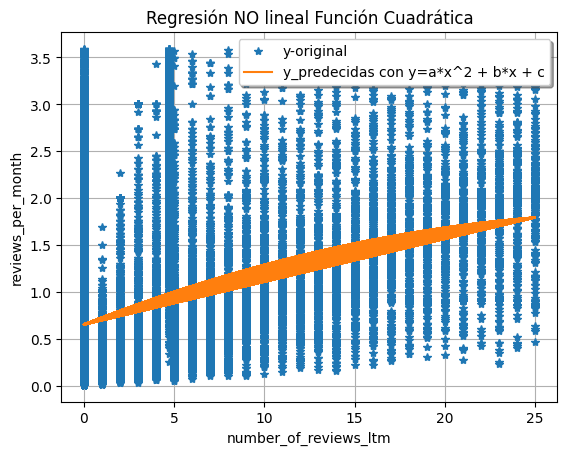

In [ ]:
def  func15 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros15, covs= curve_fit(func15 , vars_indep_5, var_dep_5)
# Predicciones
y_pred15 = func15(x, *parametros15)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo15= r2_score(y,y_pred15)
#Calculamos el coeficiente de correlacion del modelo
R_15=np.sqrt(R2_Modelo15)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred15, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 2:

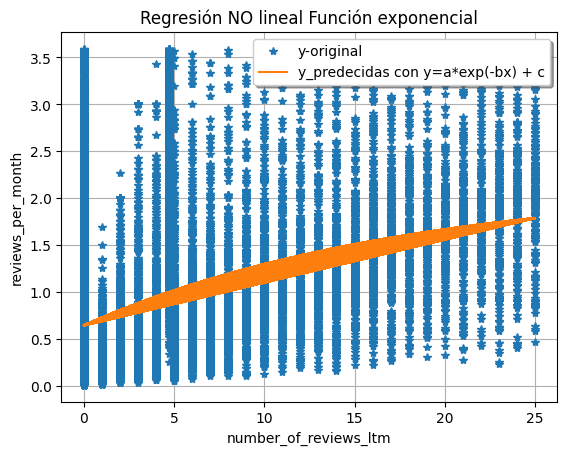

In [ ]:
def  func25 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros25, covs= curve_fit(func25 , vars_indep_5, var_dep_5)
# Predicciones
y_pred25 = func25(x, *parametros25)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo25= r2_score(y,y_pred25)
#Calculamos el coeficiente de correlacion del modelo
R_25=np.sqrt(R2_Modelo25)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred25, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 3:

<ipython-input-95-fe61a77b2133>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros35, covs35= curve_fit(func35 , vars_indep_5, var_dep_5)
<ipython-input-95-fe61a77b2133>:11: RuntimeWarning: invalid value encountered in sqrt
  R_35 =np.sqrt(R2_Modelo35)


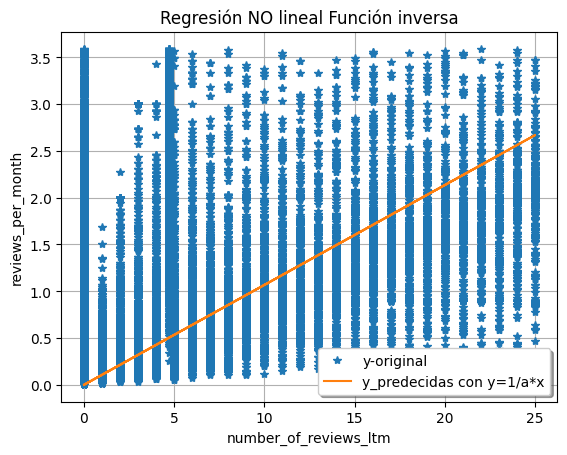

In [ ]:
def  func35 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros35, covs35= curve_fit(func35 , vars_indep_5, var_dep_5)
# Predicciones
y_pred35 = func35(x, *parametros35)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo35= r2_score(y,y_pred35)
#Calculamos el coeficiente de correlacion del modelo
R_35 =np.sqrt(R2_Modelo35)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred35, label='y_predecidas con y=1/a*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4:

<ipython-input-96-3d9324def02e>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros45, covs5 = curve_fit(func45 , vars_indep_5, var_dep_5)


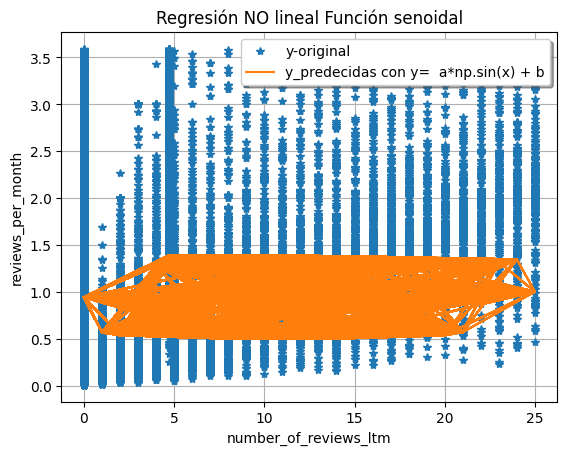

In [ ]:
def  func45 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros45, covs5 = curve_fit(func45 , vars_indep_5, var_dep_5)
# Predicciones
y_pred45 = func45(x, *parametros45)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo45 = r2_score(y,y_pred45)
#Calculamos el coeficiente de correlacion del modelo
R_45=np.sqrt(R2_Modelo45)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred45, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5:

<ipython-input-97-b2d60dcecc70>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros55, covs= curve_fit(func55 , vars_indep_5, var_dep_5)


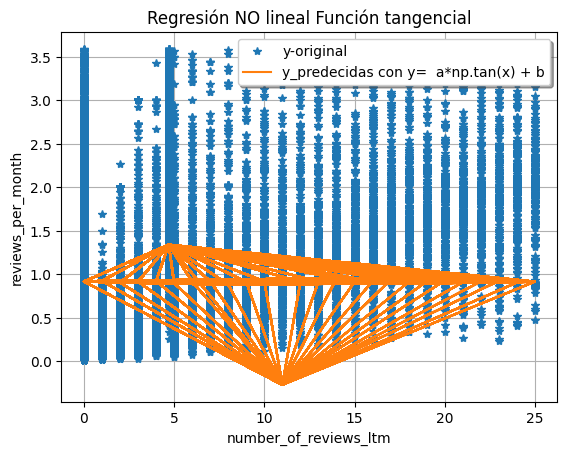

In [ ]:
def  func55 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros55, covs= curve_fit(func55 , vars_indep_5, var_dep_5)
# Predicciones
y_pred55 = func55(x, *parametros55)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo55= r2_score(y,y_pred55)
#Calculamos el coeficiente de correlacion del modelo
R_55=np.sqrt(R2_Modelo55)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred55, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6:

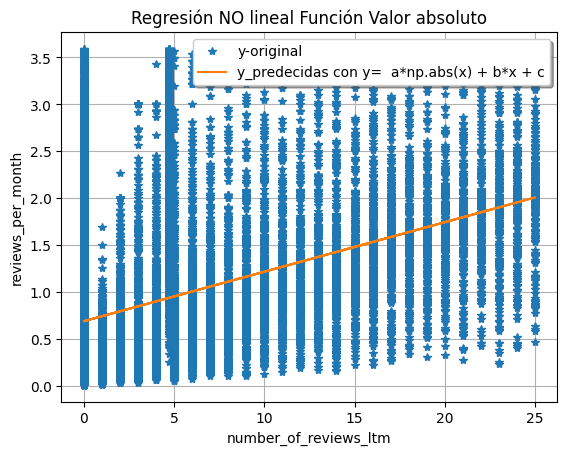

In [ ]:
def  func65 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros65, covs65= curve_fit(func65 , vars_indep_5, var_dep_5)
# Predicciones
y_pred65 = func65(x, *parametros65)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo65= r2_score(y,y_pred65)
#Calculamos el coeficiente de correlacion del modelo
R_65=np.sqrt(R2_Modelo65)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred65, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7:

<ipython-input-99-3f03c214c44b>:11: RuntimeWarning: invalid value encountered in sqrt
  R_75 =np.sqrt(R2_Modelo75)


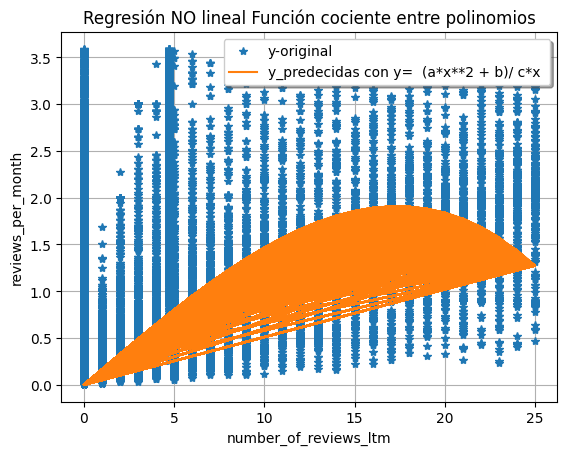

In [ ]:
def  func75 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros75, covs75= curve_fit(func75 , vars_indep_5, var_dep_5)
# Predicciones
y_pred75 = func75(x, *parametros75)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo75 = r2_score(y,y_pred75)
#Calculamos el coeficiente de correlacion del modelo
R_75 =np.sqrt(R2_Modelo75)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred75, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8:

In [ ]:
'''
def  func85 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros85, covs85= curve_fit(func85 , vars_indep_5, var_dep_5)
# Predicciones
y_pred85 = func85(x, *parametros85)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo85 = r2_score(y,y_pred85)
#Calculamos el coeficiente de correlacion del modelo
R_85=np.sqrt(R2_Modelo85)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred85, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func85 (x, a, b, c):\n     return a*np.log(x) + b\n\n#Ajustamos los parámetros de la función curve_fit\nparametros85, covs85= curve_fit(func85 , vars_indep_5, var_dep_5)\n# Predicciones\ny_pred85 = func85(x, *parametros85)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo85 = r2_score(y,y_pred85)\n#Calculamos el coeficiente de correlacion del modelo\nR_85=np.sqrt(R2_Modelo85)\n\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred85, label='y_predecidas con y=  a*np.log(x) + b ')\nplt.xlabel('number_of_reviews_ltm')\nplt.ylabel('reviews_per_month')\nplt.title('Regresión NO lineal Función logaritmica')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()\n"

#### Modelo 9:

<ipython-input-101-d70e6f61e99c>:11: RuntimeWarning: invalid value encountered in sqrt
  R_95 =np.sqrt(R2_Modelo95)


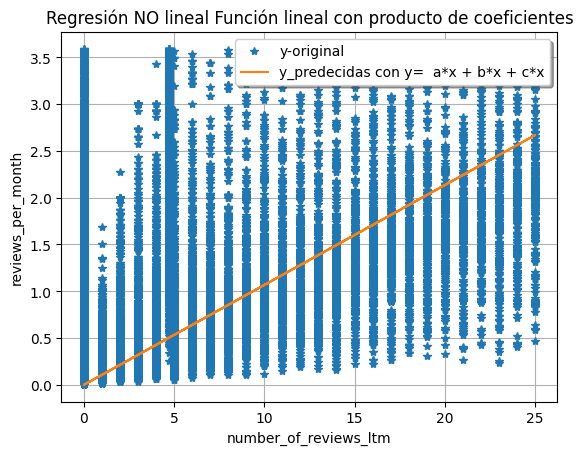

In [ ]:
def  func95 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros95, covs95= curve_fit(func95 , vars_indep_5, var_dep_5)
# Predicciones
y_pred95 = func95(x, *parametros95)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo95 = r2_score(y,y_pred95)
#Calculamos el coeficiente de correlacion del modelo
R_95 =np.sqrt(R2_Modelo95)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred95, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10:

<ipython-input-102-2d8d5a874f55>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros105, covs105= curve_fit(func105 , vars_indep_5, var_dep_5)
<ipython-input-102-2d8d5a874f55>:11: RuntimeWarning: invalid value encountered in sqrt
  R_105=np.sqrt(R2_Modelo105)


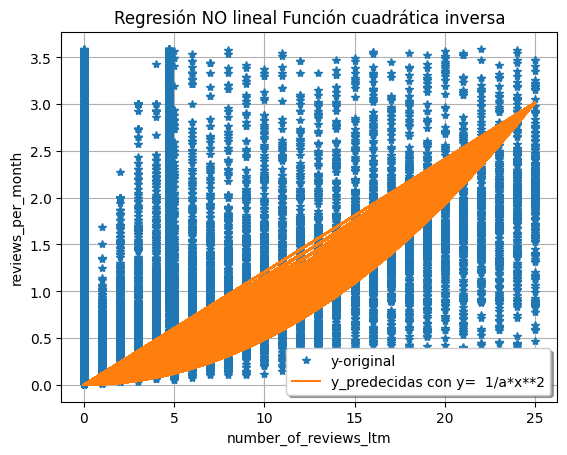

In [ ]:
def  func105 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros105, covs105= curve_fit(func105 , vars_indep_5, var_dep_5)
# Predicciones
y_pred105 = func105(x, *parametros105)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo105= r2_score(y,y_pred105)
#Calculamos el coeficiente de correlacion del modelo
R_105=np.sqrt(R2_Modelo105)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred105, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11:

<ipython-input-103-1309abe31dad>:11: RuntimeWarning: invalid value encountered in sqrt
  R_115=np.sqrt(R2_Modelo115)


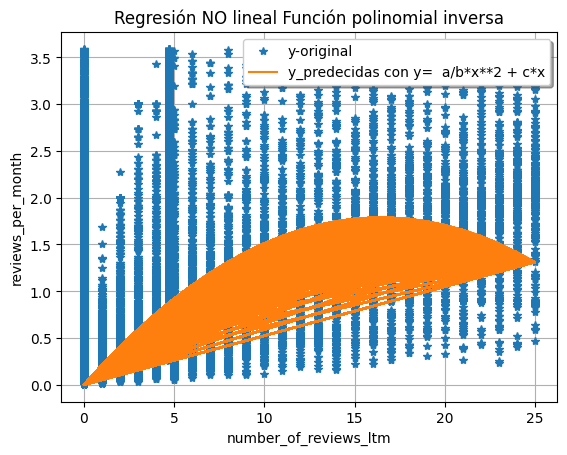

In [ ]:
def  func115(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros115, covs115= curve_fit(func115, vars_indep_5, var_dep_5)
# Predicciones
y_pred115 = func115(x, *parametros115)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo115= r2_score(y,y_pred115)
#Calculamos el coeficiente de correlacion del modelo
R_115=np.sqrt(R2_Modelo115)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred115, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES reviews_per_month

In [ ]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo15, R2_Modelo25,R2_Modelo35,R2_Modelo45,R2_Modelo55,R2_Modelo65,R2_Modelo75,R2_Modelo95,R2_Modelo105,R2_Modelo115],
    'Coeficiente de Correlación': [R_15, R_25,R_35,R_45,R_55,R_65,R_75,R_95,R_105,R_115]
}

# Generar con llaves
df_coef_mult5 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult5 = df_coef_mult5.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones reviews_per_month REGRESIÓN NO MULTIPLE\n\n', df_coef_mult5)
print('\nMejor Modelo:\n', df_coef_mult5.iloc[0])

Tabla de correlaciones reviews_per_month REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 2: Función Exponencial                                           0.155135   
Modelo 1: Función Cuadrática                                            0.154470   
Modelo 6: Función Valor absoluto                                        0.150949   
Modelo 4: Función senoidal                                              0.112600   
Modelo 5: Función tangencial                                            0.052781   
Modelo 11: Función polinomial inversa                                  -0.139376   
Modelo 7: Función cociente entre polinomios                            -0.178394   
Modelo 3: Función inversa                                              -0.280712   
Modelo 9: Función lineal con producto de coefic...                     -0.280712   
Modelo 10: Función cuadrática inversa                                  -0.621572   

          

### price

In [ ]:
a=corr_factors1.sort_values(by='price', ascending=False).head(7)
a.head()

,host_is_superhost,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
price,0.093790,0.246511,0.060776,0.080573,0.000373,0.071405,0.076517,0.069165,0.140497,0.059874,...,0.144408,0.051156,0.052123,0.041824,0.058409,0.053453,0.090712,0.014069,0.086507,0.124610
bedrooms,0.040426,0.251013,0.045141,0.051313,0.000490,0.047273,0.057360,0.048675,0.089660,0.086028,...,0.048681,0.018866,0.011433,0.000659,0.020975,0.011955,0.024846,0.005292,0.067167,0.068055
bathrooms,0.031841,0.139721,0.083122,0.088504,0.005447,0.042542,0.026408,0.018977,0.090119,0.050625,...,0.051251,0.019876,0.009760,0.002327,0.012181,0.006697,0.030972,0.012289,0.037266,0.077730
accommodates,0.005881,0.421850,0.037620,0.039742,0.006575,0.003986,0.008065,0.004613,0.118622,0.040424,...,0.018173,0.023682,0.023070,0.042546,0.016980,0.018450,0.005130,0.030507,0.018165,0.010418
room_type,0.074308,1.000000,0.012383,0.061589,0.021328,0.053824,0.079456,0.075158,0.117716,0.006770,...,0.155837,0.069610,0.042456,0.056144,0.061800,0.060001,0.033200,0.084735,0.091979,0.118153


In [ ]:
#Variable Independiente
a5=a.index[1]
a5

'bedrooms'

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_6 = data_evaluar[a5]
var_dep_6 = data_evaluar['price']

In [ ]:
x=vars_indep_6
y=var_dep_6

### Modelos:

#### Modelo 1

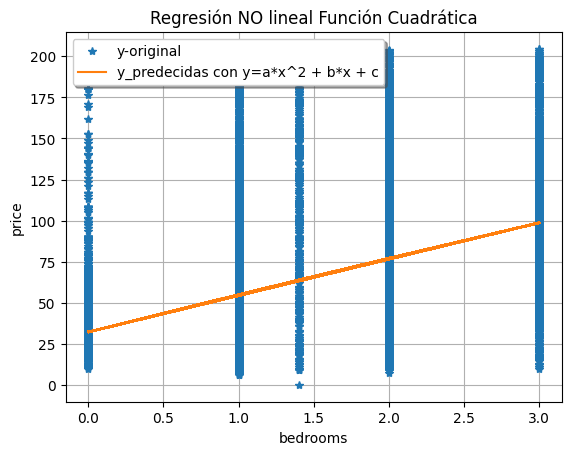

In [ ]:
def  func16 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros16, covs= curve_fit(func16 , vars_indep_6, var_dep_6)
# Predicciones
y_pred16 = func16(x, *parametros16)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo16= r2_score(y,y_pred16)
#Calculamos el coeficiente de correlacion del modelo
R_16 =np.sqrt(R2_Modelo16)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred16, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 2

<ipython-input-166-6ae27d5c7292>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros26, covs= curve_fit(func26 , vars_indep_6, var_dep_6)


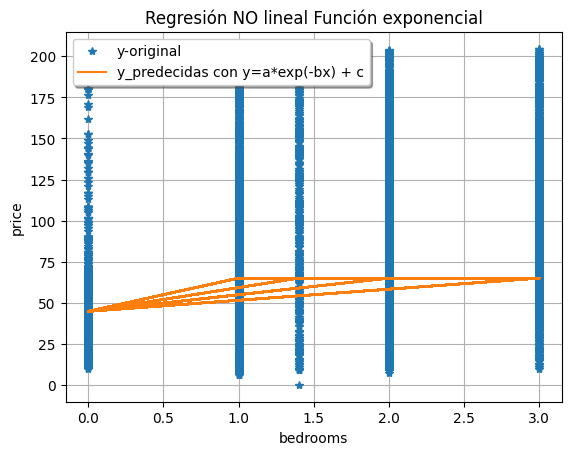

In [ ]:
def  func26 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros26, covs= curve_fit(func26 , vars_indep_6, var_dep_6)
# Predicciones
y_pred26 = func26(x, *parametros26)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo26= r2_score(y,y_pred26)
#Calculamos el coeficiente de correlacion del modelo
R_26=np.sqrt(R2_Modelo26)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred26, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 3

<ipython-input-167-86cc03731d07>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros36, covs36= curve_fit(func36 , vars_indep_6, var_dep_6)


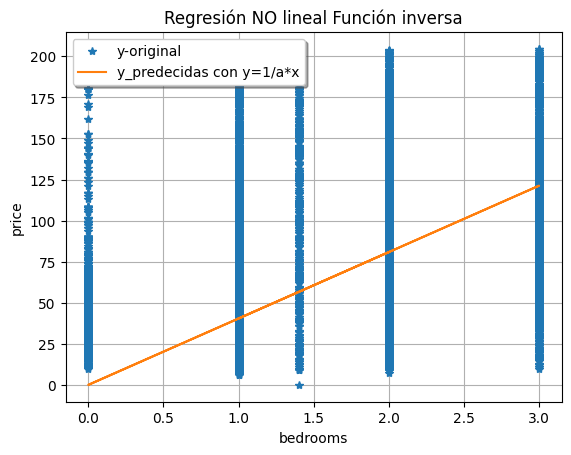

In [ ]:
def  func36 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros36, covs36= curve_fit(func36 , vars_indep_6, var_dep_6)
# Predicciones
y_pred36 = func36(x, *parametros36)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo36= r2_score(y,y_pred36)
#Calculamos el coeficiente de correlacion del modelo
R_36 =np.sqrt(R2_Modelo36)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred36, label='y_predecidas con y=1/a*x')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4

<ipython-input-168-3cd996c99332>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros46, covs6 = curve_fit(func46 , vars_indep_6, var_dep_6)


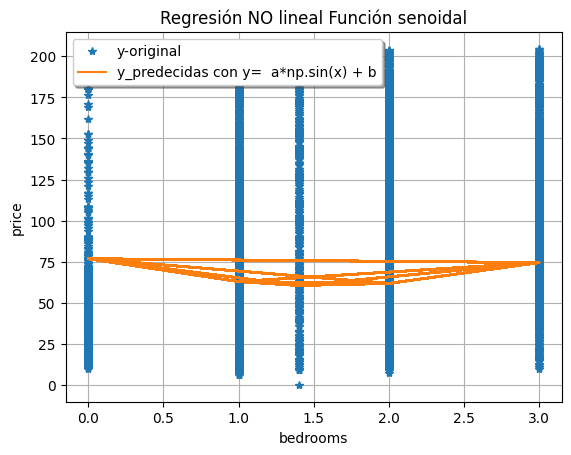

In [ ]:
def  func46 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros46, covs6 = curve_fit(func46 , vars_indep_6, var_dep_6)
# Predicciones
y_pred46 = func46(x, *parametros46)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo46 = r2_score(y,y_pred46)
#Calculamos el coeficiente de correlacion del modelo
R_46=np.sqrt(R2_Modelo46)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred46, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5

<ipython-input-169-906f3c1f98f8>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros56, covs= curve_fit(func56 , vars_indep_6, var_dep_6)


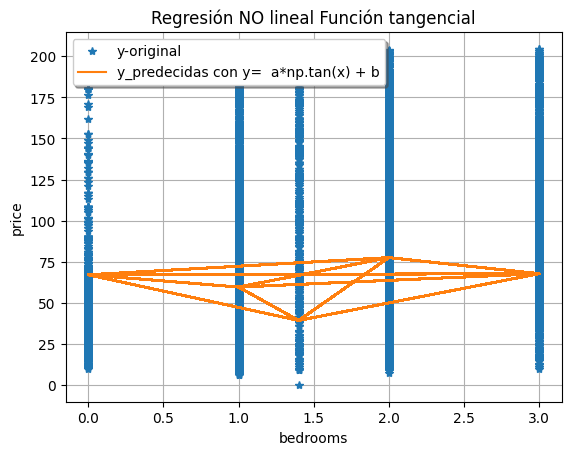

In [ ]:
def  func56 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros56, covs= curve_fit(func56 , vars_indep_6, var_dep_6)
# Predicciones
y_pred56 = func56(x, *parametros56)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo56= r2_score(y,y_pred56)
#Calculamos el coeficiente de correlacion del modelo
R_56=np.sqrt(R2_Modelo56)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred56, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6

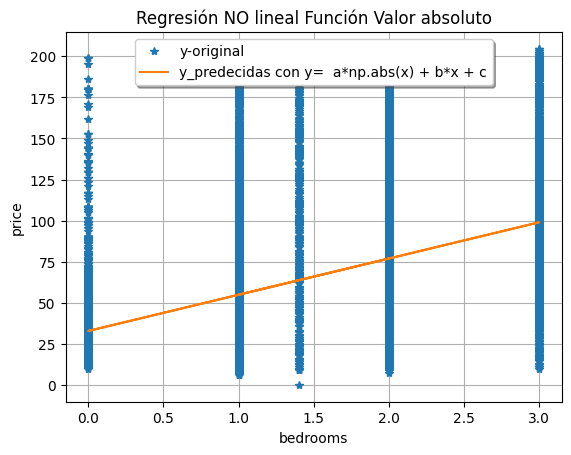

In [ ]:
def  func66 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros66, covs66= curve_fit(func66 , vars_indep_6, var_dep_6)
# Predicciones
y_pred66 = func66(x, *parametros66)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo66= r2_score(y,y_pred66)
#Calculamos el coeficiente de correlacion del modelo
R_66=np.sqrt(R2_Modelo66)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred66, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7

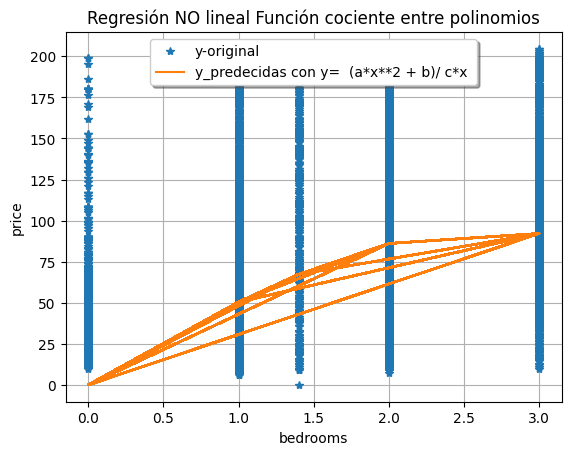

In [ ]:
def  func76 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros76, covs76= curve_fit(func76 , vars_indep_6, var_dep_6)
# Predicciones
y_pred76 = func76(x, *parametros76)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo76 = r2_score(y,y_pred76)
#Calculamos el coeficiente de correlacion del modelo
R_76 =np.sqrt(R2_Modelo76)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred76, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8

In [ ]:
'''
def  func86 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros86, covs86= curve_fit(func86 , vars_indep_6, var_dep_6)
# Predicciones
y_pred86 = func86(x, *parametros86)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo86 = r2_score(y,y_pred86)
#Calculamos el coeficiente de correlacion del modelo
R_86=np.sqrt(R2_Modelo86)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred86, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func86 (x, a, b, c):\n     return a*np.log(x) + b\n\n#Ajustamos los parámetros de la función curve_fit\nparametros86, covs86= curve_fit(func86 , vars_indep_6, var_dep_6)\n# Predicciones\ny_pred86 = func86(x, *parametros86)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo86 = r2_score(y,y_pred86)\n#Calculamos el coeficiente de correlacion del modelo\nR_86=np.sqrt(R2_Modelo86)\n\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred86, label='y_predecidas con y=  a*np.log(x) + b ')\nplt.xlabel('bedrooms')\nplt.ylabel('price')\nplt.title('Regresión NO lineal Función logaritmica')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()\n"

#### Modelo 9

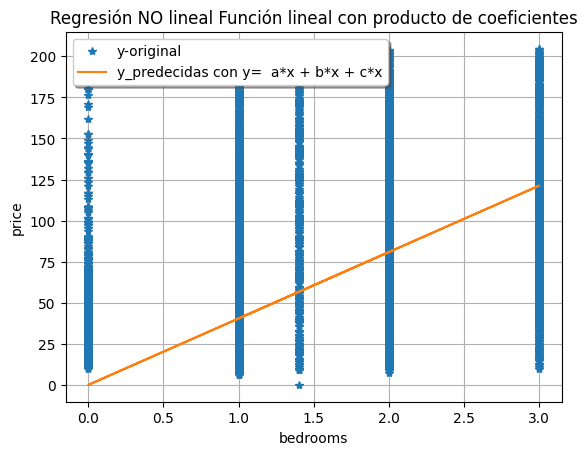

In [ ]:
def  func96 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros96, covs96= curve_fit(func96 , vars_indep_6, var_dep_6)
# Predicciones
y_pred96 = func96(x, *parametros96)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo96 = r2_score(y,y_pred96)
#Calculamos el coeficiente de correlacion del modelo
R_96 =np.sqrt(R2_Modelo96)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred96, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10

<ipython-input-174-3844eb721bec>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros106, covs106= curve_fit(func106 , vars_indep_6, var_dep_6)
<ipython-input-174-3844eb721bec>:11: RuntimeWarning: invalid value encountered in sqrt
  R_106=np.sqrt(R2_Modelo106)


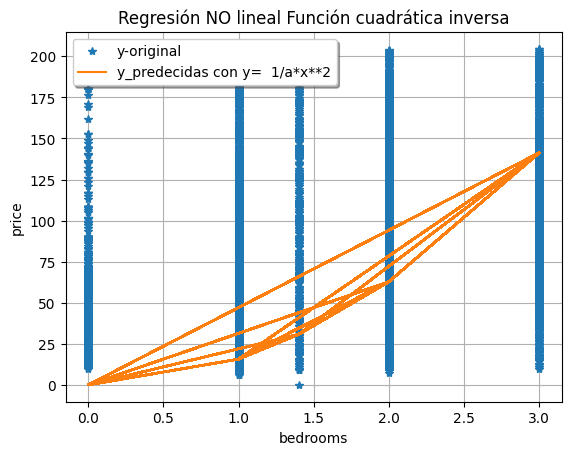

In [ ]:
def  func106 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros106, covs106= curve_fit(func106 , vars_indep_6, var_dep_6)
# Predicciones
y_pred106 = func106(x, *parametros106)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo106= r2_score(y,y_pred106)
#Calculamos el coeficiente de correlacion del modelo
R_106=np.sqrt(R2_Modelo106)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred106, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11

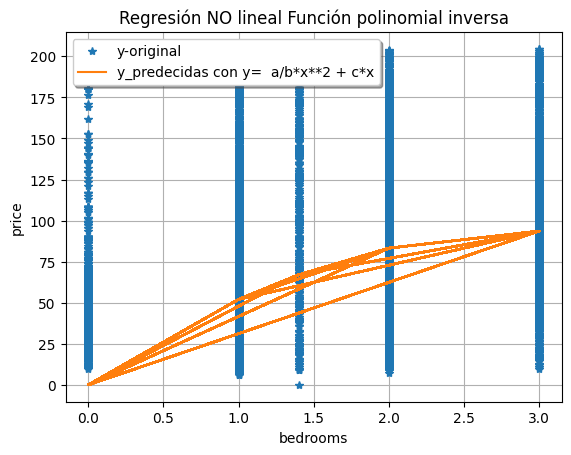

In [ ]:
def  func116(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros116, covs116= curve_fit(func116, vars_indep_6, var_dep_6)
# Predicciones
y_pred116 = func116(x, *parametros116)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo116= r2_score(y,y_pred116)
#Calculamos el coeficiente de correlacion del modelo
R_116=np.sqrt(R2_Modelo116)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred116, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES price

In [ ]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo16, R2_Modelo26,R2_Modelo36,R2_Modelo46,R2_Modelo56,R2_Modelo66,R2_Modelo76,R2_Modelo96,R2_Modelo106,R2_Modelo116],
    'Coeficiente de Correlación': [R_16, R_26,R_36,R_46,R_56,R_66,R_76,R_96,R_106,R_116]
}

# Generar con llaves
df_coef_mult6 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult6 = df_coef_mult6.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones price REGRESIÓN NO MULTIPLE\n\n', df_coef_mult6)
print('\nMejor Modelo:\n', df_coef_mult6.iloc[0])

Tabla de correlaciones price REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 2: Función Exponencial                                           0.036590   
Modelo 1: Función Cuadrática                                            0.031292   
Modelo 6: Función Valor absoluto                                        0.020854   
Modelo 4: Función senoidal                                              0.004952   
Modelo 5: Función tangencial                                            0.002930   
Modelo 11: Función polinomial inversa                                  -1.498605   
Modelo 7: Función cociente entre polinomios                            -1.593105   
Modelo 3: Función inversa                                              -1.840425   
Modelo 9: Función lineal con producto de coefic...                     -1.840425   
Modelo 10: Función cuadrática inversa                                  -2.212177   

                      

# Dashboard

In [ ]:
#Instalamos la libreria STREAMLIT
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
#Instalamos la libreria PLOTLY
%pip install plotly

In [ ]:
#Instalamos la libreria para análisis de variables categóricas
%pip install funpymodeling

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.6 MB/s 

In [ ]:
#Instalamos el tunnel local (node.js)
#Para instalar npm en VS
#1. Desde Google escribir node.js
#2. Instalar la versión más recomendada
!npm install localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


# Código





In [ ]:
%%writefile app.py
#Creamos el archivo de la APP en el interprete principal (Phyton)

#############################IMPLEMENTACIÓN DE DASHBOARD################################

#Verificamos que todas las librerias se puedan importar
#Importamos librerias
import streamlit as st
import plotly.express as px
import pandas as pd
import numpy as np
from funpymodeling.exploratory import freq_tbl

#################################################################

#Definimos la instancia de streamlit
@st.cache_resource

#################################################################

#Creamos la función de carga de datos
def load_data():
    #Lectura del archivo csv sin indice
    df1=pd.read_csv("rio_de_janeiro_USD_Categorizado.csv")
    #Carga desde un archivo csv con indice
    df2= pd.read_csv("rio_de_janeiro_USD_Categorizado.csv", index_col= 'Name')
    df3=pd.read_csv("rio_de_janeiro_USD.csv")
    #Carga desde un archivo csv con indice
    df4= pd.read_csv("rio_de_janeiro_USD.csv", index_col= 'Name')

#################################################################

   #Etapa de procesamiento de Datos

    #ANÁLISIS UNIVARIADO DE FRECUENCIAS
    #Obtengo un análisis univariado de una variable categórica en específico
    table= freq_tbl(df1['price'])
    #Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
    Filtro= table[table['frequency']>1]
    #Ajusto el indice de mi dataframe
    Filtro_index1= Filtro.set_index('price')

    #Selecciono las columnas tipo numericas del dataframe Filtro_index1
    numeric_df1 = Filtro_index1.select_dtypes(['float','int'])  #Devuelve Columnas
    numeric_cols1= numeric_df1.columns                          #Devuelve lista de Columnas

    #Selecciono las columnas tipo numericas del dataframe df2
    numeric_df2 = df2.select_dtypes(['float','int'])  #Devuelve Columnas
    numeric_cols2= numeric_df2.columns                 #Devuelve lista de Columnas


    return Filtro_index1, df2, numeric_df1, numeric_cols1, numeric_df2, numeric_cols2

    #Test 1 (streamlit run app.py)

#################################################################

#Cargo los datos obtenidos de la función "load_data"
Filtro_index1, df2, numeric_df1, numeric_cols1, numeric_df2, numeric_cols2 = load_data()

######################CREACIÓN DEL DASHBOARD################################

#1. CREACIÓN DE LA SIDEBAR
#Generamos los encabezados para la barra lateral (sidebar)
st.sidebar.title("DASHBOARD")
st.sidebar.header("Sidebar")
st.sidebar.header("Panel de selección")
st.sidebar.header('Actividad 3.6 Regresión NO Lineal')
st.sidebar.subheader('Equipo 2:\nCésar Rivera\nDiego Soto\nJulio Sotero')



#Test 2 (streamlit run app.py)

#################################################################

#2. CREACIÓN DE LOS FRAMES
#Generamos los Frames que utilizaremos en el diseño
#Widget 1: Selectbox
#Menu desplegable de opciones de los Frames seleccionados
Frames= st.selectbox(label= "Frames", options= ["Descripción de la actividad","Rio de Janeiro", "México", "Málaga"])

#Test 3 (streamlit run app.py)

#################################################################

if Frames == 'Descripción de la actividad':
  st.title('Actividad 3.6: Regresión NO Lineal')
  st.header('Descripción de la actividad')
  st.subheader('Elegir 2 modelos de correlación No lineal')
  st.subheader('Analizar la correlación que existe entre las siguientes variables: \
  \n-host_response_rate (variable objetivo)\
  \n-host_acceptance_rate (variable objetivo)\
  \n-host_total_listings_count (variable objetivo)\
  \n-accommodates (variable objetivo)\
  \n-reviews_per_month (variable objetivo)\
  \n-price(variable objetivo)')

if Frames == "Rio de Janeiro":
    # Generamos los encabezados para el dashboard
    st.title("Rio de Janeiro")
    st.header("Conjunto de datos Rio de Janeiro REGRESIÓN NO LINEAL")
    st.subheader("Para esta esta sección se planteó ")

    # Agregar la imagen
    image_RIO_url = "https://media.architecturaldigest.com/photos/56f4781d904aa1ac0ac47256/16:9/w_2580,c_limit/Cristo%20Redentor.jpg"
    st.image(image_RIO_url, caption="Imagen de Rio de Janeiro", use_column_width=True)

    #Test 4 (streamlit run app.py)

    #Widget 2: Checkbox
    #Generamos un cuadro de selección (Checkbox) en una barra lateral (sidebar) para mostrar dataset
    check_box = st.sidebar.checkbox(label= "Mostrar Dataset")
    #Condicional para que aparezca el dataframe
    if check_box:
        #Mostramos el dataset
        st.write(Filtro_index1)
        st.write(df2)

        #Test 5 (streamlit run app.py)

    #Widget 3: Multiselect box
    #Generamos un cuadro de multi-selección (Y) para seleccionar variables a graficar
    Vars_num_selected= st.sidebar.multiselect(label="Variables graficadas", options= numeric_cols2)

    #Test 6 (streamlit run app.py)

    #GRAPH 1: LINEPLOT
    #Despliegue de un line plot, definiendo las variables "X categorias" y "Y numéricas"
    figure1 = px.line(data_frame=df2, x=df2.index,
                  y= Vars_num_selected, title= str('price'),
                  width=1600, height=600)
    #Mostramos el lineplot
    st.plotly_chart(figure1)

    #Test 7 (streamlit run app.py)



Overwriting app.py


# Segunda parte

In [ ]:
'''
#################################################################

    #4. CONTENIDO DEL FRAME 2
if Frames == "México":
    #Generamos los encabezados para el dashboard
    st.title("México")
    st.header("Frame Secundario")
    st.subheader("Bar Plot")

    #Test 8 (streamlit run app.py)

    #Menu desplegable de opciones de las variables numéricas graficadas
    Vars_Num= st.selectbox(label= "Variables", options= ["frequency", "percentage", "cumulative_perc"])
    if Vars_Num == "frequency":
        numeric_cols1[0]
    if Vars_Num == "percentage":
        numeric_cols1[1]
    if Vars_Num == "cumulative_perc":
        numeric_cols1[2]

    #Test 9 (streamlit run app.py)

    #GRAPH 2: BARPLOT
    #Despliegue de un bar plot, definiendo las variables "X categorias" y "Y numéricas"
    figure2 = px.bar(data_frame=Filtro_index1, x=Filtro_index1.index,
                  y= Vars_Num, title= str('Análisis Univariado'))
    figure2.update_xaxes(automargin=True)
    figure2.update_yaxes(automargin=True)

    #Test 10 (streamlit run app.py)

    #Widget 4: Button
    #Generamos un button (Button) en la barra lateral (sidebar) para mostrar las variables tipo texto
    Button = st.sidebar.button(label= "Mostrar grafica tipo BARPLOT")
    #Condicional para que aparezca el dataframe
    if Button:
        #Mostramos el barplot
        st.plotly_chart(figure2)
###################################################################################3

    #5. CONTENIDO DEL FRAME 3
if Frames == "Frame 3":
    #Generamos los encabezados para el dashboard
    st.title("TITANIC")
    st.header("Frame Secundario")
    st.subheader("Scatter Plot")

    #Generamos dos cuadros de multi-selección (Y) para seleccionar variables a graficar
    x_selected= st.sidebar.selectbox(label= "x", options= numeric_cols2)
    y_selected= st.sidebar.selectbox(label= "y", options= numeric_cols2)

    #Test 13 (streamlit run app.py)

    #GRAPH 3: SCATTERPLOT
    #Despliegue de un bar plot, definiendo las variables "X categorias" y "Y numéricas"
    figure3 = px.scatter(data_frame=numeric_df2, x=x_selected, y= y_selected,
                     title= 'Dispersiones')
    st.plotly_chart(figure3)

#####################################################################################3

    #6. CONTENIDO DEL FRAME 4
if Frames == "Frame 4":
    #Generamos los encabezados para el dashboard
    st.title("TITANIC")
    st.header("Frame Secundario")
    st.subheader("Pie Plot")

    #Test 15 (streamlit run app.py)

    #Menu desplegable de opciones de la variables seleccionadas
    Variable_num= st.sidebar.selectbox(label= "Variable Numérica", options= numeric_cols2)

    #Test 16 (streamlit run app.py)

    #GRAPH 4: PIEPLOT
    #Despliegue de un pie plot, definiendo las variables "X categorias" y "Y numéricas"
    figure4 = px.pie(data_frame=df2, names=df2.index,
                  values= Variable_num, title= str('Features Passengers'),
                  width=1600, height=600)
    st.plotly_chart(figure4)

    ###########################################################################################

    #Customización del panel general
st.markdown(
   """
    <style>
    .stApp {
        background-color: grey; /* Cambia el color aquí */
    }
    h1 {
        font-size: 40px;
        color: white; /* Cambia el color aquí */
        font-weight: bold;
        text-align: left; /* Alinear a la izquierda el texto */
        }
    h2 {
        font-size: 24px;
        color: white; /* Cambia el color aquí */
        font-weight: bold;
        text-align: left; /* Alinear a la izquierda el texto */
        }
    h3 {
        font-size: 12px;
        color: blue; /* Cambia el color aquí */
        font-weight: bold;
        text-align: left; /* Alinear a la izquierda el texto */
        }
    </style>
    """,
    unsafe_allow_html=True
)


############################################################################################
#Customización de la sidebar
st.sidebar.markdown(
    """
    <style>
    .stSidebar {
        background-color: orange; /* Cambia el color aquí */
    }
    .stSidebar h1 {
        font-size: 30px;
        color: white; /* Cambia el color aquí */
        font-weight: bold;
        text-align: center; /* Centrar el texto */
    }
    .stSidebar h2 {
        font-size: 24px;
        color: blue; /* Cambia el color aquí */
        font-weight: bold;
        text-align: left; /* Alinear a la izquierda el texto */
    }
    .stSidebar h3 {
        font-size: 18px;
        color: black; /* Cambia el color aquí */
        font-weight: bold;
        text-align: left; /* Alinear a la izquierda el texto */
    }
    .stButton > button {
        background-color: red; /* Cambia el color de fondo */
        color: white; /* Cambia el color del texto */
        padding: 10px 20px; /* Añade algo de padding */
        border: none; /* Sin bordes */
        border-radius: 5px; /* Bordes redondeados */
        cursor: pointer; /* Cambia el cursor */
    }
    .stButton > button:hover {
        background-color: green; /* Cambia el color al pasar el ratón */
        color: white; /* Cambia el color del texto */
    }
    </style>
    """,
    unsafe_allow_html=True
)
################################################################################
'''

# URL

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.237.103.57



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.103.57:8501

your url is: https://ready-pianos-design.loca.lt
2024-10-14 18:31:28.699 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 58, in <module>
    Filtro_index1, df2, numeric_df1, numeric_cols1, numeric_df2, numeric_cols2 = load_data()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/caching/cache_utils.py", line 210, in __call__
    return self._get_or_create_cached_value(args, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/streamli